# MODELO PREDICTIVO PARA EL DESARROLLO DE PROGRAMAS CON ENFOQUE DIFERENCIAL PARA LAS MUJERES DEL DEPARTAMENTO DE CALDAS

El objetivo principal es Desarrollar un modelo no supervisado, con inteligencia artificial, que le permita a los actores sociales y territoriales del departamento de Caldas, identificar patrones críticos en salud mental que promuevan programas de promoción y prevención con enfoque de género.




Pendiente agregar composición de la base de datos, variables descritas!!!



Gedny Libeth Hernández Montoya
Cristina Quintero Escobar
Silvia Juliana Macias Parra


In [ ]:
# @title Conexión con la base de datos desde una URL

#@markdown - Forma 1 de descarga de archivos desde Google Drive con wget
# Forma de descarga de archivos desde Google Drive con wget
# Se requiere el uso de cookies para la autenticación
# Se debe obtener el ID del archivo de Google Drive para poder descargarlo
# Se usa el comando wget para descargar el archivo, gestionando las cookies
# param url: URL de la base de datos
# param nombre_archivo: Nombre del archivo a guardar

# URL = 'https://drive.google.com/file/d/1ugDytz2MBJhIAQUVG6wzPZa6HOpboS32/view?usp=sharing'
# Definir el ID del archivo de Google Drive
FILEID = '1ugDytz2MBJhIAQUVG6wzPZa6HOpboS32'
nombre_archivo = 'RIPS_consulta_salud_mental.csv'

# Descargar el archivo usando wget, gestionando las cookies
# Se usa --load-cookies para cargar las cookies guardadas temporalmente en /tmp/cookies.txt
# Se hace una primera solicitud con wget para obtener el token de confirmación que Google Drive envía cuando el archivo es grande o muy accedido
# El token se extrae usando sed (una utilidad para filtrar y procesar texto), que busca el patrón "confirm=" y captura el valor del token
# Una vez obtenido el token de confirmación, se realiza la descarga completa del archivo
# --no-check-certificate es usado para evitar errores de SSL (certificados) en entornos no seguros
# El archivo se guarda como "Spotify_Most_Streamed_Songs.csv" . indicado con el nombre del archivo en la variable "nombre_archivo"
# Finalmente, se eliminan las cookies temporales almacenadas en /tmp/cookies.txt

# con esta instrucción se descarga el archivo desde Google Drive
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O $nombre_archivo && rm -rf /tmp/cookies.txt


--2025-03-15 21:55:25--  https://docs.google.com/uc?export=download&confirm=&id=1ugDytz2MBJhIAQUVG6wzPZa6HOpboS32
Resolving docs.google.com (docs.google.com)... 172.217.0.78, 2607:f8b0:4025:810::200e
Connecting to docs.google.com (docs.google.com)|172.217.0.78|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1ugDytz2MBJhIAQUVG6wzPZa6HOpboS32&export=download [following]
--2025-03-15 21:55:25--  https://drive.usercontent.google.com/download?id=1ugDytz2MBJhIAQUVG6wzPZa6HOpboS32&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.217.15.225, 2607:f8b0:4025:802::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.217.15.225|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1845592 (1.8M) [application/octet-stream]
Saving to: ‘RIPS_consulta_salud_mental.csv’

RIPS_consulta_salud 100%[===================>]   1.76M  -

# Desglose:

- FILEID = '1M8fB-SdAEZZ98_jEaM5ifyhlh9np3D99': El ID del archivo de Google Drive que se desea descargar.
- Primera llamada wget:
Obtiene un token de confirmación cuando Google Drive requiere verificación extra para archivos grandes o descargados muchas veces.\
Usa sed para buscar y extraer el token de la respuesta de Google Drive.
- Segunda llamada wget:
Con el token, se realiza la descarga final del archivo.\
rm -rf /tmp/cookies.txt: Limpia las cookies temporales después de completar la descarga.

In [ ]:
# @title Instalar librerias a usar
%pip install sweetviz
%pip install missingno

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 13.5 MB/s eta 0:00:00


In [ ]:
# prompt: necesito una función para contar numeros

def contar_numeros(texto):
  """
  Cuenta la cantidad de números presentes en un texto.

  Args:
    texto: El texto en el que se desea contar los números.

  Returns:
    La cantidad de números encontrados en el texto.
  """
  contador = 0
  for palabra in texto.split():
    if palabra.isdigit():
      contador += 1
  return contador

# Ejemplo de uso:
texto = """
# # MODELO PREDICTIVO PARA EL DESARROLLO DE PROGRAMAS CON ENFOQUE DIFERENCIAL PARA LAS MUJERES DEL DEPARTAMENTO DE CALDAS
#
# El objetivo principal es Desarrollar un modelo no supervisado, con inteligencia artificial, que le permita a los actores sociales y territoriales del departamento de Caldas, identificar patrones críticos en salud mental que promuevan programas de promoción y prevención con enfoque de género.
#
#
#
#
# Pendiente agregar composición de la base de datos, variables descritas!!!
#
#
# Gedny Libeth Hernández Montoya
# Cristina Quintero Escobar
# Silvia Juliana Macias Parra
#
# @title Conexión con la base de datos desde una URL

#@markdown - Forma 1 de descarga de archivos desde Google Drive con wget
# Forma de descarga de archivos desde Google Drive con wget
# Se requiere el uso de cookies para la autenticación
# Se debe obtener el ID del archivo de Google Drive para poder descargarlo
# Se usa el comando wget para descargar el archivo, gestionando las cookies
# param url: URL de la base de datos
# param nombre_archivo: Nombre del archivo a guardar

# URL = 'https://drive.google.com/file/d/1ugDytz2MBJhIAQUVG6wzPZa6HOpboS32/view?usp=sharing'
# Definir el ID del archivo de Google Drive
FILEID = '1ugDytz2MBJhIAQUVG6wzPZa6HOpboS32'
nombre_archivo = 'RIPS_consulta_salud_mental.csv'

# Descargar el archivo usando wget, gestionando las cookies
# Se usa --load-cookies para cargar las cookies guardadas temporalmente en /tmp/cookies.txt
# Se hace una primera solicitud con wget para obtener el token de confirmación que Google Drive envía cuando el archivo es grande o muy accedido
# El token se extrae usando sed (una utilidad para filtrar y procesar texto), que busca el patrón "confirm=" y captura el valor del token
# Una vez obtenido el token de confirmación, se realiza la descarga completa del archivo
# --no-check-certificate es usado para evitar errores de SSL (certificados) en entornos no seguros
# El archivo se guarda como "Spotify_Most_Streamed_Songs.csv" . indicado con el nombre del archivo en la variable "nombre_archivo"
# Finalmente, se eliminan las cookies temporales almacenadas en /tmp/cookies.txt

# con esta instrucción se descarga el archivo desde Google Drive
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O $nombre_archivo && rm -rf /tmp/cookies.txt

# # Desglose:
#
# - FILEID = '1M8fB-SdAEZZ98_jEaM5ifyhlh9np3D99': El ID del archivo de Google Drive que se desea descargar.
# - Primera llamada wget:
# Obtiene un token de confirmación cuando Google Drive requiere verificación extra para archivos grandes o descargados muchas veces.\
# Usa sed para buscar y extraer el token de la respuesta de Google Drive.
# - Segunda llamada wget:
# Con el token, se realiza la descarga final del archivo.\
# rm -rf /tmp/cookies.txt: Limpia las cookies temporales después de completar la descarga.
# @title Instalar librerias a usar
%pip install sweetviz
%pip install missingno
"""

cantidad_numeros = contar_numeros(texto)
print("La cantidad de números en el texto es:", cantidad_numeros)


In [ ]:
# @title Carga de librerias
# Bibliotecas utilizadas
# ----------------------------------------------------------------------------
# pandas (pd): librería para el análisis de datos
# matplotlib (plt): librería para crear gráficos
# seaborn (sns): librería para visualizar datos de manera estética
# Sweetviz (sw): Una biblioteca de análisis y visualización de datos en Python.
# files : Importa la función para subir y descargar archivos en Google Colab.
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sw
from google.colab import files
import numpy as np
import missingno as msno

In [ ]:
# @title Cargamos las funciones relacionadas
def analizar_columnas(df):
  """
  Analiza las columnas de un DataFrame y devuelve información estadística.

  Parámetros:
  df (DataFrame): El DataFrame a analizar.

  Retorno:
  Un DataFrame con la información estadística de cada columna.

  Ejemplo:
  df_analizado = analizar_columnas(df)
  print(df_analizado)
  """
  info = []
  for columna in df.columns:
    unicos = df[columna].nunique()
    nulos = df[columna].isnull().sum()
    total = len(df)
    porcentaje_nulos = (nulos / total) * 100
    info.append({
      'Columna': columna,
      'Cantidad de registros': total,
      'Únicos': unicos,
      'Cantidad de nulos': nulos,
      'Porcentaje de nulos': porcentaje_nulos,
      'Registros relacionados con nulos': total - nulos
    })
  return pd.DataFrame(info)


# Sección 1

### Paso 1: Cargar el archivo CSV

In [ ]:
# @title Cargar el archivo CSV de canciones de Spotify
# Ubicación en donde se almacena en drive
df_analizado = pd.read_csv(nombre_archivo, encoding="ISO-8859-1", delimiter=';')  # Otra variante de Latin-1


# Mostrar las primeras filas del archivo para ver cómo están organizados los datos
print("Primeras 5 filas de los datos de Spotify:")
df_analizado.head()


Primeras 5 filas de los datos de Spotify:


,Atención,FEMENINO,MASCULINO,NO DEFINIDO,NR - NO REPORTADO,Año,Ubicación
0,"F000 - DEMENCIA EN LA ENFERMEDAD DE ALZHEIMER,...",9.0,11.0,NaN,NaN,2018,17001 - Manizales
1,"F001 - DEMENCIA EN LA ENFERMEDAD DE ALZHEIMER,...",63.0,21.0,NaN,NaN,2018,17001 - Manizales
2,"F002 - DEMENCIA EN LA ENFERMEDAD DE ALZHEIMER,...",43.0,25.0,NaN,NaN,2018,17001 - Manizales
3,"F009 - DEMENCIA EN LA ENFERMEDAD DE ALZHEIMER,...",193.0,81.0,NaN,NaN,2018,17001 - Manizales
4,F010 - DEMENCIA VASCULAR DE COMIENZO AGUDO,2.0,NaN,NaN,NaN,2018,17001 - Manizales


In [ ]:
# @title Visualización de composición de la base de datos.
df_analizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19530 entries, 0 to 19529
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Atención           19530 non-null  object 
 1   FEMENINO           7749 non-null   float64
 2   MASCULINO          8573 non-null   float64
 3   NO DEFINIDO        33 non-null     float64
 4   NR - NO REPORTADO  84 non-null     float64
 5   Año                19530 non-null  int64  
 6   Ubicación          19530 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 1.0+ MB


### Paso 2: Explorar los datos

Vamos a verificar la estructura de los datos, la cantidad de filas y columnas, así como cualquier dato vacío.

In [ ]:
# @title Verificar la forma de los datos
print(f"Forma de los datos (filas, columnas): {df_analizado.shape}")

Forma de los datos (filas, columnas): (19530, 7)


In [ ]:
# @title Verificar los tipos de datos de cada columna
print("\nTipos de datos por columna:")
print(df_analizado.dtypes)


Tipos de datos por columna:
Atención              object
FEMENINO             float64
MASCULINO            float64
NO DEFINIDO          float64
NR - NO REPORTADO    float64
Año                    int64
Ubicación             object
dtype: object


In [ ]:
# Replace NaN values with 0 in 'FEMENINO' and 'MASCULINO' columns
df_analizado['FEMENINO'].fillna(0, inplace=True)
df_analizado['MASCULINO'].fillna(0, inplace=True)


<ipython-input-9-555d594fddb3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_analizado['FEMENINO'].fillna(0, inplace=True)
<ipython-input-9-555d594fddb3>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [ ]:
# Assuming 'Ubicación' is the column you want to split
# and the separator is '-'

def split_location(df):
    """
    Splits the 'Ubicación' column into 'Código' and 'Ubicación' based on '-'.

    Args:
        df: The input DataFrame.

    Returns:
        The DataFrame with added 'Código' and 'Ubicación' columns.
            Returns the original DataFrame if 'Ubicación' column is not found or if splitting fails.
    """
    try:
      if 'Ubicación' not in df.columns:
          print("Error: 'Ubicación' column not found in the DataFrame.")
          return df

      df[['Código', 'Nueva_Ubicación']] = df['Ubicación'].str.split('-', n=1, expand=True)
      return df
    except Exception as e:
        print(f"An error occurred during location splitting: {e}")
        return df

# Example usage (assuming df_analizado is your DataFrame):
df_analizado = split_location(df_analizado)
df_analizado.drop(columns=['Ubicación'], inplace=True)
# Display the updated DataFrame to verify the changes
df_analizado.head()


,Atención,FEMENINO,MASCULINO,NO DEFINIDO,NR - NO REPORTADO,Año,Código,Nueva_Ubicación
0,"F000 - DEMENCIA EN LA ENFERMEDAD DE ALZHEIMER,...",9.0,11.0,NaN,NaN,2018,17001,Manizales
1,"F001 - DEMENCIA EN LA ENFERMEDAD DE ALZHEIMER,...",63.0,21.0,NaN,NaN,2018,17001,Manizales
2,"F002 - DEMENCIA EN LA ENFERMEDAD DE ALZHEIMER,...",43.0,25.0,NaN,NaN,2018,17001,Manizales
3,"F009 - DEMENCIA EN LA ENFERMEDAD DE ALZHEIMER,...",193.0,81.0,NaN,NaN,2018,17001,Manizales
4,F010 - DEMENCIA VASCULAR DE COMIENZO AGUDO,2.0,0.0,NaN,NaN,2018,17001,Manizales


In [ ]:
import pandas as pd
import re

# Función para clasificar cada entrada
def clasificar_atencion(fila):
    # Extraer código y descripción
    partes = fila.split(' - ', 1)
    codigo = partes[0].strip()

    # Limpiar descripción si existe
    descripcion = partes[1].replace('\x86', '').strip() if len(partes) > 1 else ''

    # Determinar tipo de entrada
    if codigo.isdigit():
        return {
            'Categoria_Principal': 'Geografia',
            'Subcategoria': descripcion,
            'Codigo': codigo,
            'Descripcion': descripcion
        }

    # Clasificación CIE-10
    clasificacion = {
        'Categoria_Principal': 'Otros trastornos',
        'Subcategoria': descripcion,
        'Codigo': codigo,
        'Descripcion': descripcion
    }

    # Extraer parte numérica del código
    match = re.match(r'F(\d{2})', codigo)
    if match:
        codigo_num = int(match.group(1))

        if 0 <= codigo_num <= 9:
            clasificacion['Categoria_Principal'] = 'Trastornos mentales orgánicos'#'#F00-F09)'
        elif 10 <= codigo_num <= 19:
            clasificacion['Categoria_Principal'] = 'Trastornos por sustancias'#'#F10-F19)'
        elif 20 <= codigo_num <= 29:
            clasificacion['Categoria_Principal'] = 'Esquizofrenia'#F20-F29)'
        elif 30 <= codigo_num <= 39:
            clasificacion['Categoria_Principal'] = 'Trastornos del humor'#F30-F39)'
        elif 40 <= codigo_num <= 48:
            clasificacion['Categoria_Principal'] = 'Trastornos neuróticos'#F40-F48)'
        elif 50 <= codigo_num <= 59:
            clasificacion['Categoria_Principal'] = 'Síndromes comportamentales'#F50-F59)'
        elif 60 <= codigo_num <= 69:
            clasificacion['Categoria_Principal'] = 'Trastornos personalidad'#F60-F69)'
        elif 70 <= codigo_num <= 79:
            clasificacion['Categoria_Principal'] = 'Retraso mental'#F70-F79)'
        elif 80 <= codigo_num <= 89:
            clasificacion['Categoria_Principal'] = 'Trastornos desarrollo'#F80-F89)'
        elif 90 <= codigo_num <= 98:
            clasificacion['Categoria_Principal'] = 'Trastornos comportamiento infantil'#F90-F98)'
        elif codigo_num == 99:
            clasificacion['Categoria_Principal'] = 'Trastorno mental no especificado'#F99)'

    return clasificacion

# Aplicar la función al DataFrame
df_clasificado = df_analizado['Atención'].apply(
    lambda x: pd.Series(clasificar_atencion(x))
)

# Unir con el DataFrame original
df_final = pd.concat([df_analizado, df_clasificado], axis=1)

# Ejemplo de resultado
df_final[['Atención', 'Categoria_Principal', 'Subcategoria']].head()

,Atención,Categoria_Principal,Subcategoria
0,"F000 - DEMENCIA EN LA ENFERMEDAD DE ALZHEIMER,...",Trastornos mentales orgánicos,"DEMENCIA EN LA ENFERMEDAD DE ALZHEIMER, DE COM..."
1,"F001 - DEMENCIA EN LA ENFERMEDAD DE ALZHEIMER,...",Trastornos mentales orgánicos,"DEMENCIA EN LA ENFERMEDAD DE ALZHEIMER, DE COM..."
2,"F002 - DEMENCIA EN LA ENFERMEDAD DE ALZHEIMER,...",Trastornos mentales orgánicos,"DEMENCIA EN LA ENFERMEDAD DE ALZHEIMER, ATIPIC..."
3,"F009 - DEMENCIA EN LA ENFERMEDAD DE ALZHEIMER,...",Trastornos mentales orgánicos,"DEMENCIA EN LA ENFERMEDAD DE ALZHEIMER, NO ESP..."
4,F010 - DEMENCIA VASCULAR DE COMIENZO AGUDO,Trastornos mentales orgánicos,DEMENCIA VASCULAR DE COMIENZO AGUDO


In [ ]:
# @title Verificación de los campos con relación a la composición de la base de dato almacenada en formato CSV
df_analizado_ = analizar_columnas(df_final)
df_analizado_

,Columna,Cantidad de registros,Únicos,Cantidad de nulos,Porcentaje de nulos,Registros relacionados con nulos
0,Atención,19530,403,0,0.000000,19530
1,FEMENINO,19530,222,0,0.000000,19530
2,MASCULINO,19530,203,0,0.000000,19530
3,NO DEFINIDO,19530,3,19497,99.831029,33
4,NR - NO REPORTADO,19530,4,19446,99.569892,84
5,Año,19530,3,0,0.000000,19530
6,Código,19530,1515,0,0.000000,19530
7,Nueva_Ubicación,19530,27,0,0.000000,19530
8,Categoria_Principal,19530,11,0,0.000000,19530
9,Subcategoria,19530,403,0,0.000000,19530


In [ ]:
df_final

,Atención,FEMENINO,MASCULINO,Año,Código,Nueva_Ubicación,Categoria_Principal,Subcategoria,Codigo,Descripcion
0,"F000 - DEMENCIA EN LA ENFERMEDAD DE ALZHEIMER,...",9.0,11.0,2018,17001,Manizales,Trastornos mentales orgánicos,"DEMENCIA EN LA ENFERMEDAD DE ALZHEIMER, DE COM...",F000,"DEMENCIA EN LA ENFERMEDAD DE ALZHEIMER, DE COM..."
1,"F001 - DEMENCIA EN LA ENFERMEDAD DE ALZHEIMER,...",63.0,21.0,2018,17001,Manizales,Trastornos mentales orgánicos,"DEMENCIA EN LA ENFERMEDAD DE ALZHEIMER, DE COM...",F001,"DEMENCIA EN LA ENFERMEDAD DE ALZHEIMER, DE COM..."
2,"F002 - DEMENCIA EN LA ENFERMEDAD DE ALZHEIMER,...",43.0,25.0,2018,17001,Manizales,Trastornos mentales orgánicos,"DEMENCIA EN LA ENFERMEDAD DE ALZHEIMER, ATIPIC...",F002,"DEMENCIA EN LA ENFERMEDAD DE ALZHEIMER, ATIPIC..."
3,"F009 - DEMENCIA EN LA ENFERMEDAD DE ALZHEIMER,...",193.0,81.0,2018,17001,Manizales,Trastornos mentales orgánicos,"DEMENCIA EN LA ENFERMEDAD DE ALZHEIMER, NO ESP...",F009,"DEMENCIA EN LA ENFERMEDAD DE ALZHEIMER, NO ESP..."
4,F010 - DEMENCIA VASCULAR DE COMIENZO AGUDO,2.0,0.0,2018,17001,Manizales,Trastornos mentales orgánicos,DEMENCIA VASCULAR DE COMIENZO AGUDO,F010,DEMENCIA VASCULAR DE COMIENZO AGUDO
...,...,...,...,...,...,...,...,...,...,...
19525,F984 - TRASTORNOS DE LOS MOVIMIENTOS ESTEREOTI...,0.0,0.0,2020,17877,Viterbo,Trastornos comportamiento infantil,TRASTORNOS DE LOS MOVIMIENTOS ESTEREOTIPADOS,F984,TRASTORNOS DE LOS MOVIMIENTOS ESTEREOTIPADOS
19526,F985 - TARTAMUDEZ [ESPASMOFEMIA],0.0,0.0,2020,17877,Viterbo,Trastornos comportamiento infantil,TARTAMUDEZ [ESPASMOFEMIA],F985,TARTAMUDEZ [ESPASMOFEMIA]
19527,F988 - OTROS TRASTORNOS EMOCIONALES Y DEL COMP...,3.0,3.0,2020,17877,Viterbo,Trastornos comportamiento infantil,OTROS TRASTORNOS EMOCIONALES Y DEL COMPORTAMIE...,F988,OTROS TRASTORNOS EMOCIONALES Y DEL COMPORTAMIE...
19528,"F989 - TRASTORNOS NO ESPECIFICADOS, EMOCIONALE...",1.0,1.0,2020,17877,Viterbo,Trastornos comportamiento infantil,"TRASTORNOS NO ESPECIFICADOS, EMOCIONALES Y DEL...",F989,"TRASTORNOS NO ESPECIFICADOS, EMOCIONALES Y DEL..."


<Axes: >

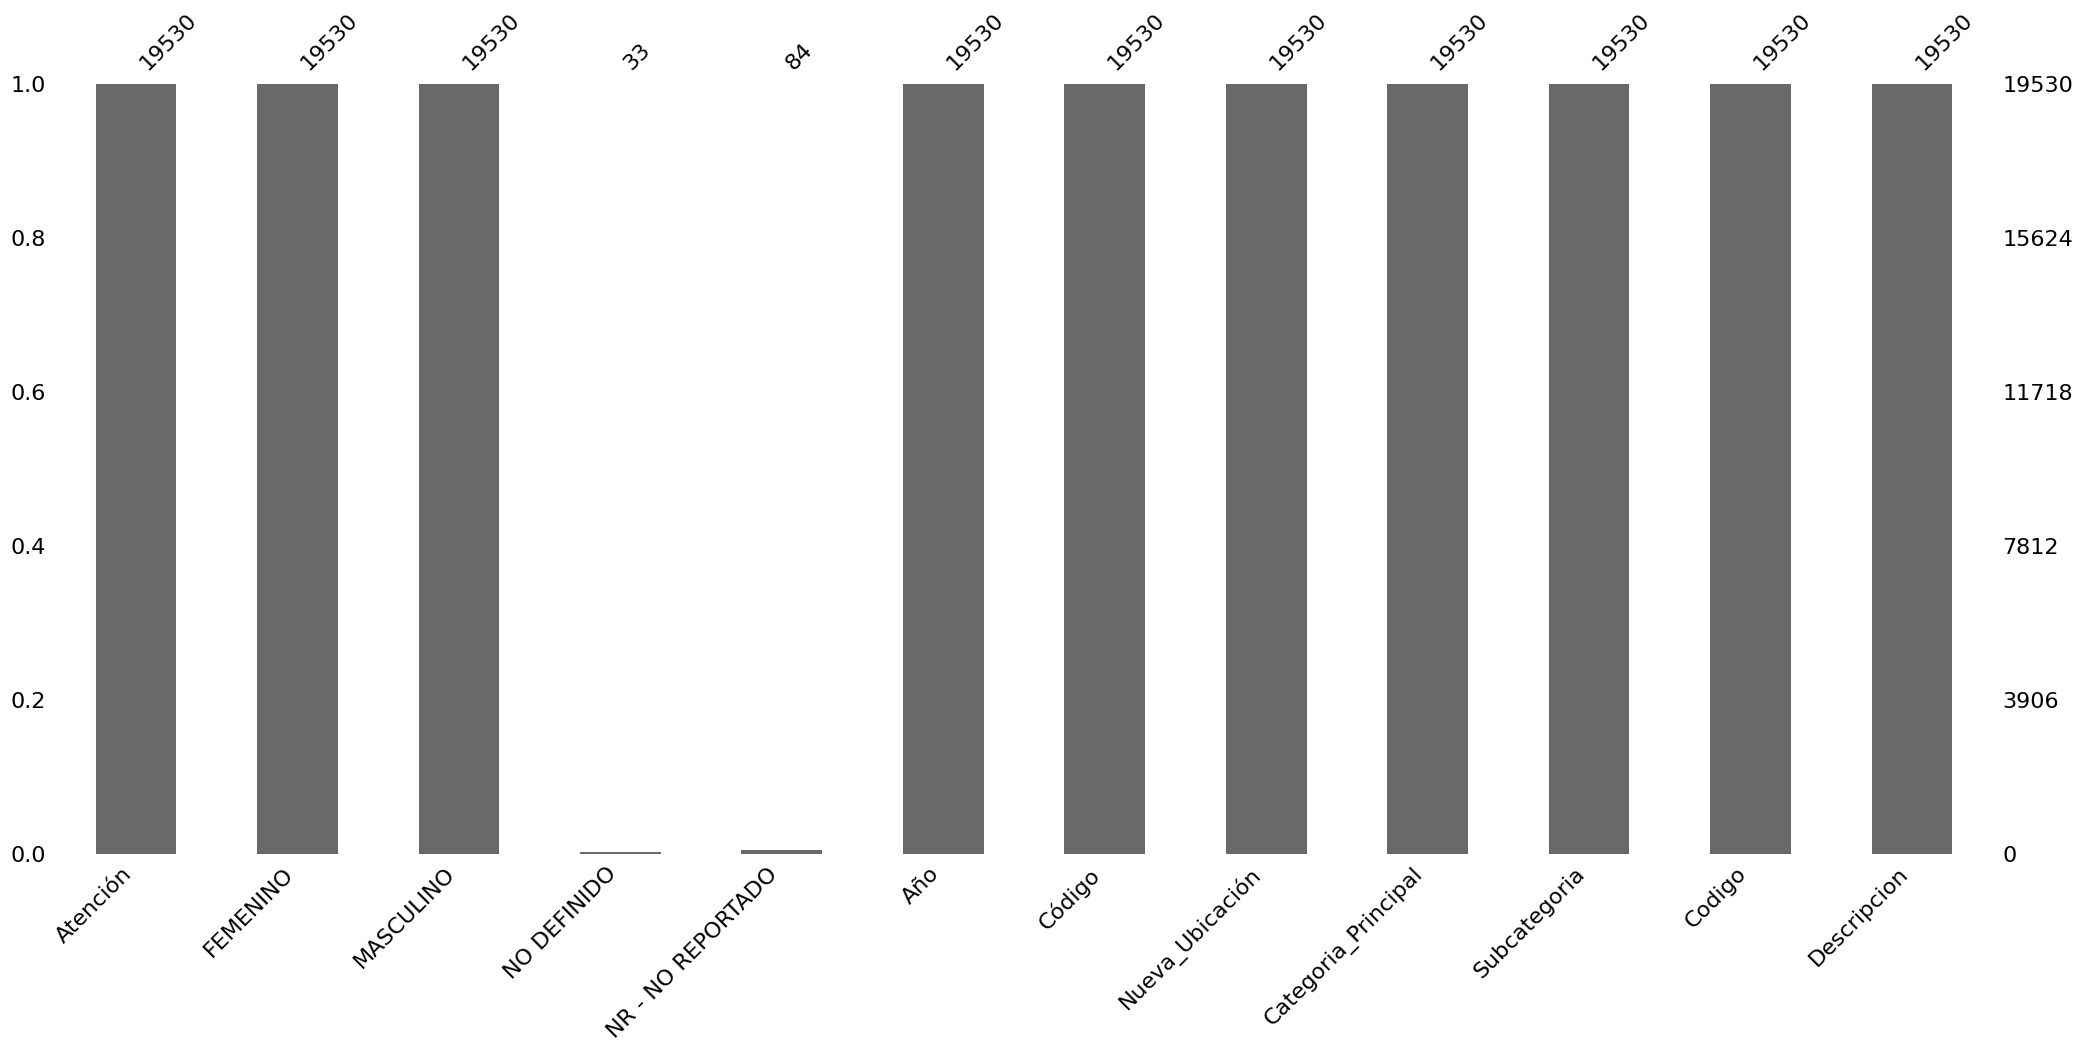

In [ ]:
# Visualizar valores nulos con un gráfico de barras
msno.bar(df_final)


<Axes: >

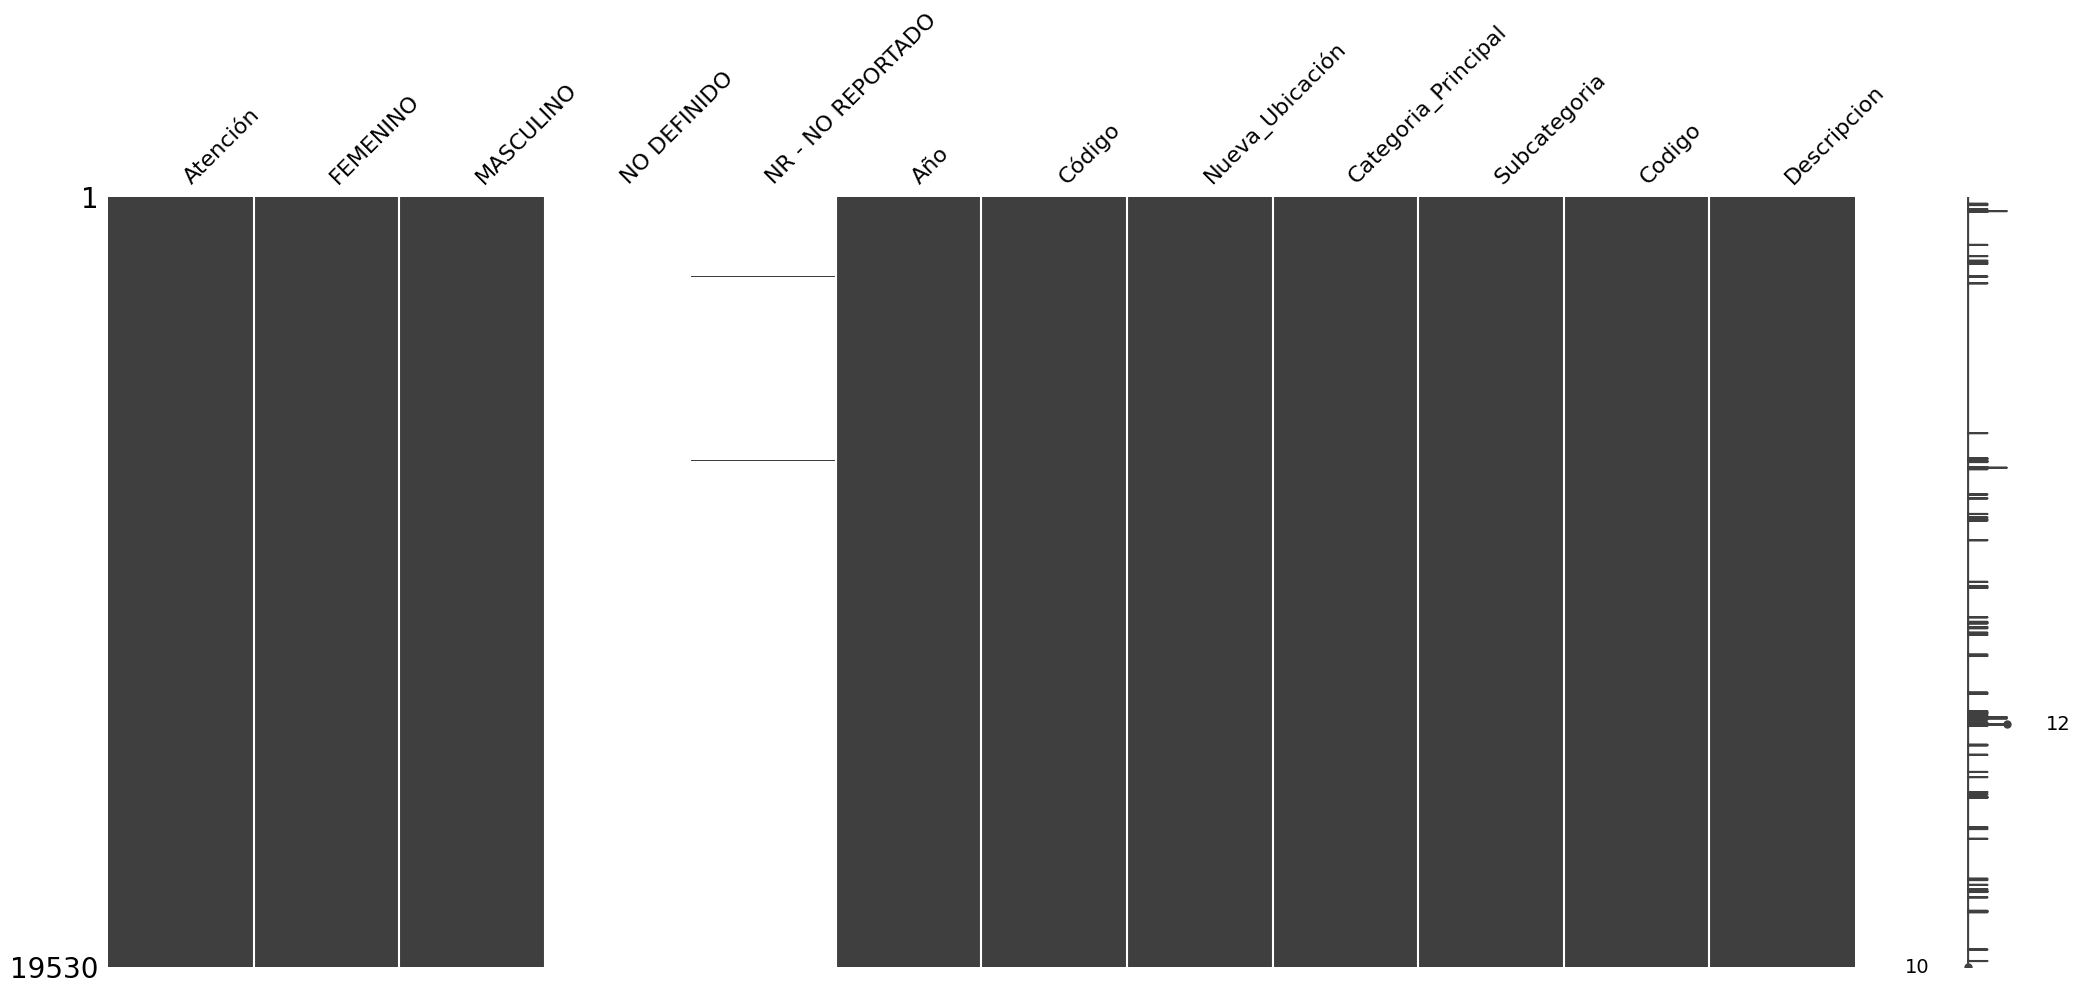

In [ ]:
# Visualizar matriz de valores faltantes
msno.matrix(df_final)

# Sección 2

In [ ]:
# @title eliminar colmnas con una cantidad menor a lo relacionado

# Calculate the percentage of missing values in each column
missing_percentage = df_final.isnull().sum() / len(df_final) * 100

# Identify columns with more than 20% missing values
columns_to_drop = missing_percentage[missing_percentage >= 20].index

# Drop the identified columns from the DataFrame
df_final = df_final.drop(columns=columns_to_drop)

# Print the updated DataFrame shape
print(f"Shape of DataFrame after dropping columns: {df_final.shape}")

# Now df_final contains only the columns with less than or equal 60% of missing values


Shape of DataFrame after dropping columns: (19530, 10)


<Axes: >

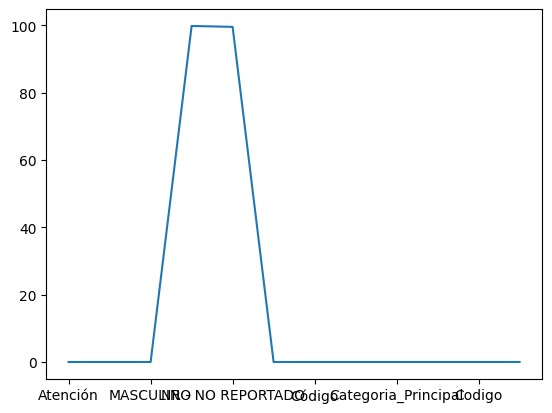

In [ ]:
missing_percentage.plot()

### Paso 3: Graficar distribuciones


Ahora, vamos a generar gráficos para visualizar algunas características de las canciones, como la distribución de la popularidad, la cantidad de reproducciones, y cualquier otra métrica relevante.

In [ ]:
# @title Análisis exploratorio de datos (EDA)
#Configurar las opciones de visualizacion Sweetviz
sw.config_parser.read_string("""
                              [Output_Defaults]
                              html_layout = widescreen
                              html_scale = 1.0
                              notebook_layout = widescreen
                              notebook_scale = 0.9
                              notebook_width = 100%
                              notebook_height = 700
                              [Layout]
                              show_logo = 0
                              """)
nombre = 'df_final'
lista_columnas_estandarizar = df_final.columns.tolist()
for col in lista_columnas_estandarizar:
  if col in df_final.columns:
    # Try converting to numeric, if it fails, convert to string
    try:
      df_final[col] = pd.to_numeric(df_final[col], errors='raise')
    except (ValueError, TypeError):
      df_final[col] = df_final[col].astype(str)

advert_report = sw.analyze([df_final, nombre], pairwise_analysis='on') # Realizamos el análisis de la base de datos inicial

#@markdown Guardar y mostrar reporte formato HTML
advert_report.show_html('EDA_df_final.html')

#@markdown Descarga y abre el reporte en una nueva pestaña del navegador
almacenar_archivo = input('Alamcenar archivo Si o No: ').title()
if almacenar_archivo == 'Si':
  files.download('/content/EDA_df_final.html')

                                             |          | [  0%]   00:00 -> (? left)

Report EDA_df_final.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
Alamcenar archivo Si o No: si


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


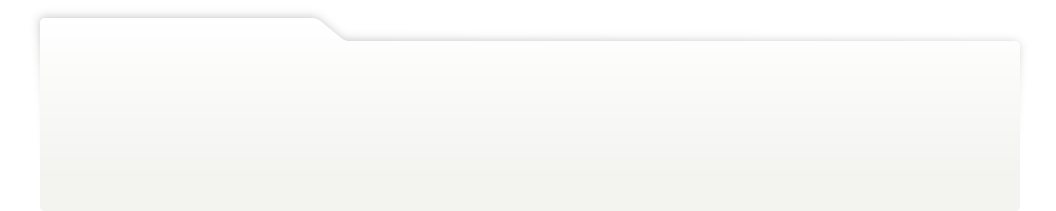
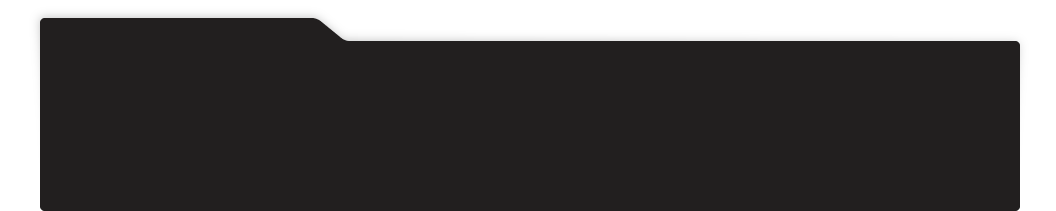
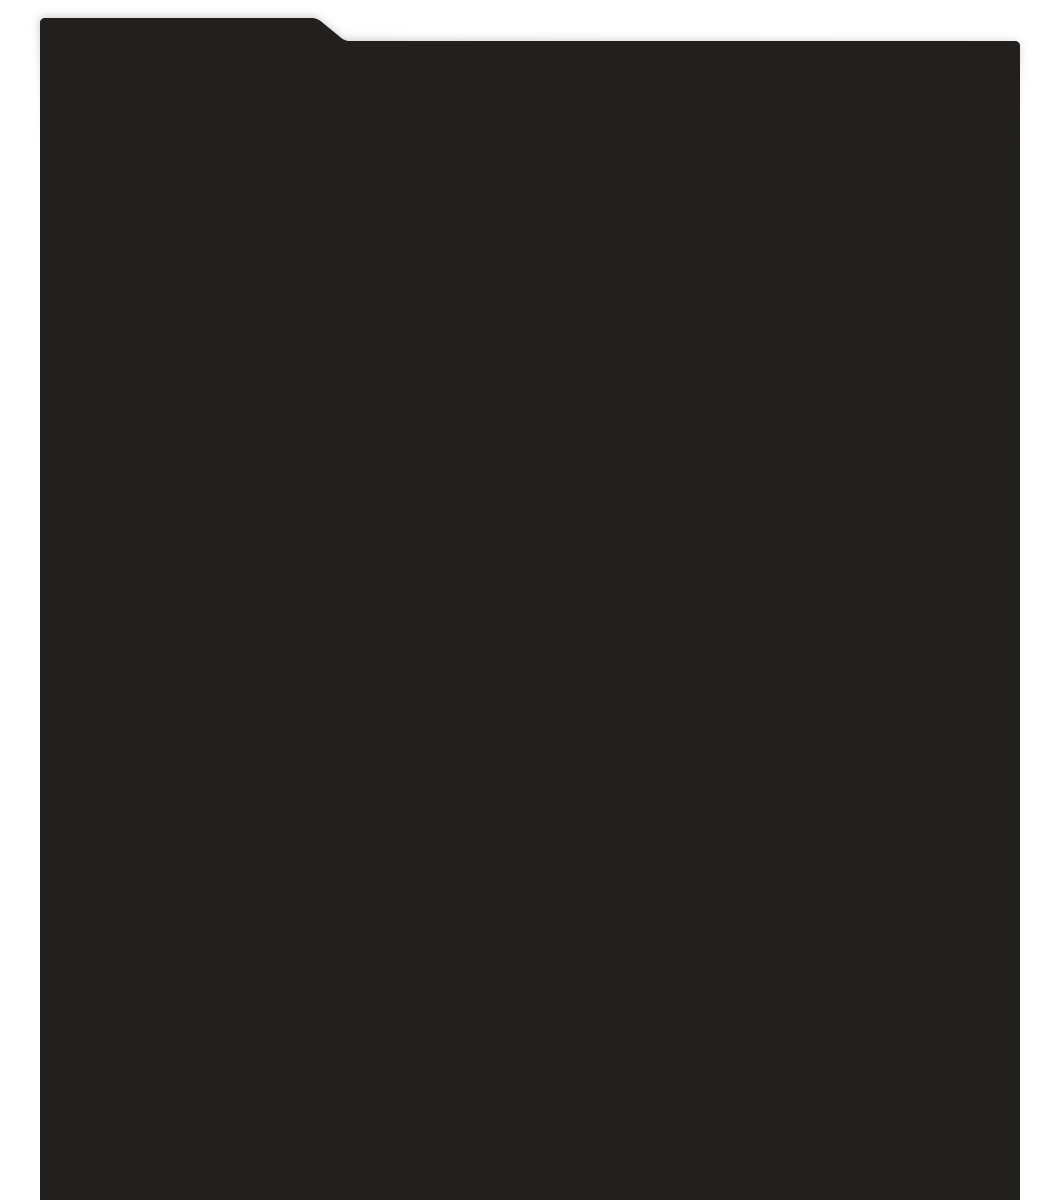
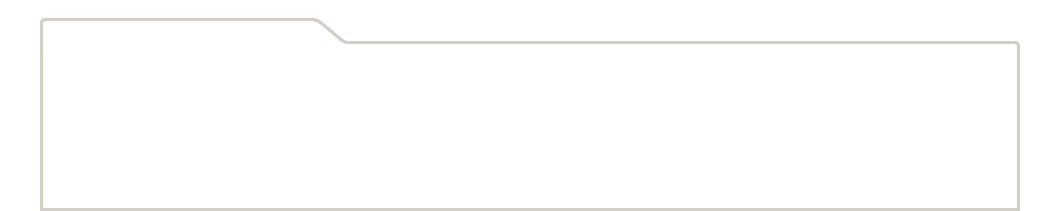
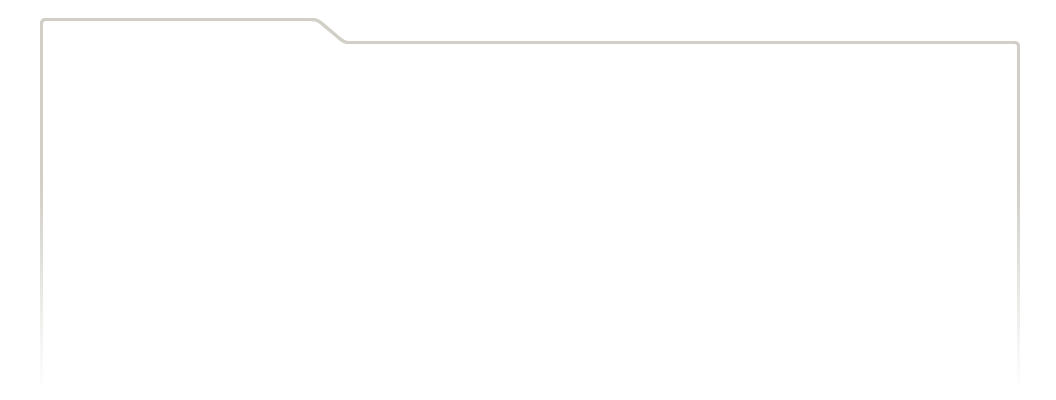
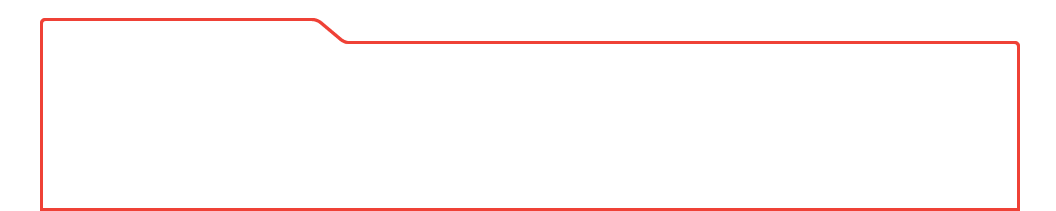
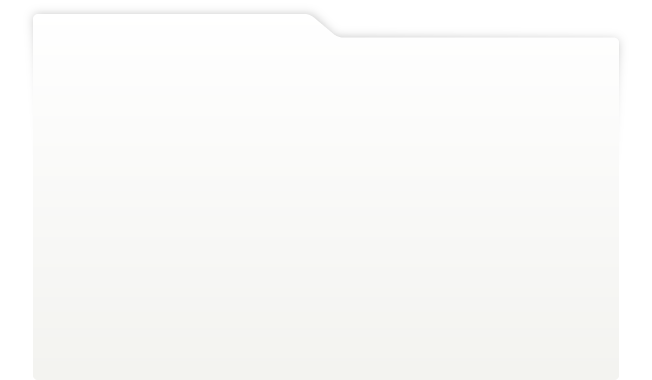
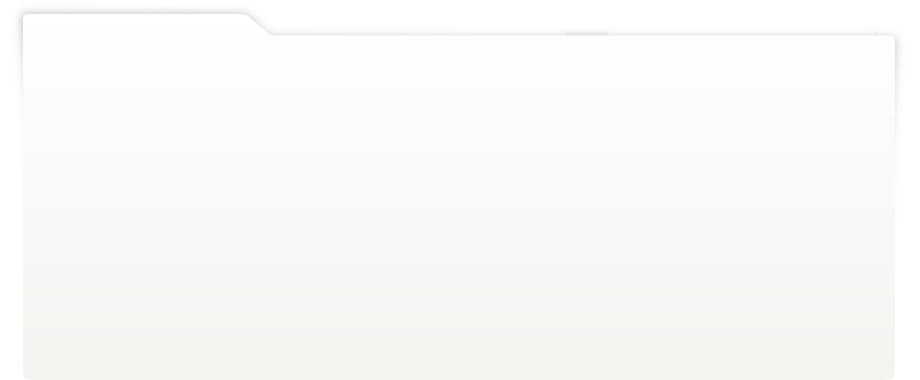
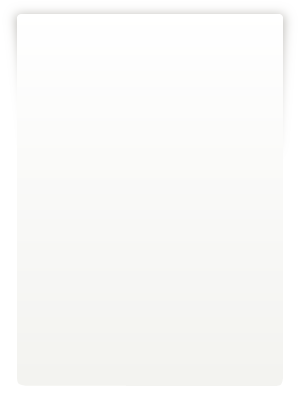
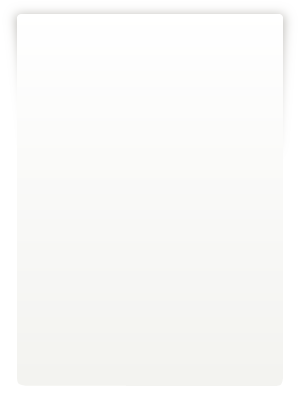
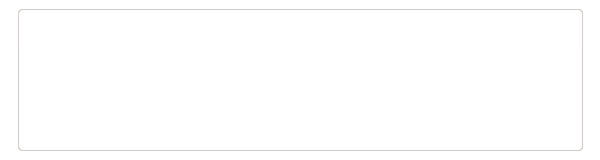
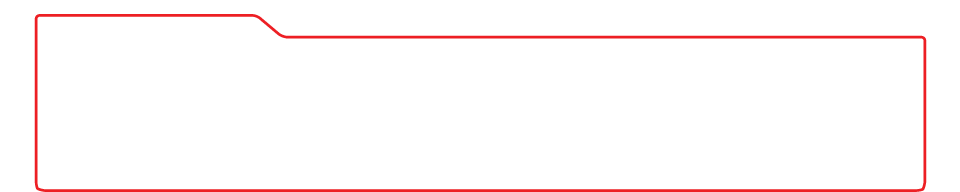
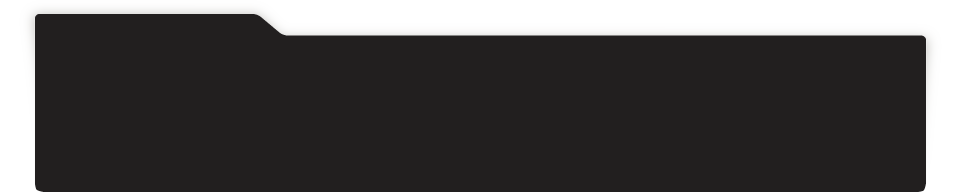
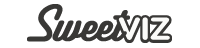
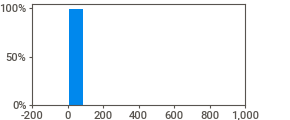
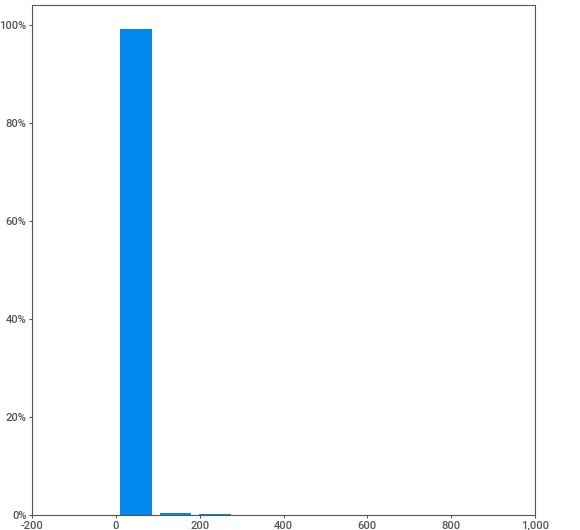
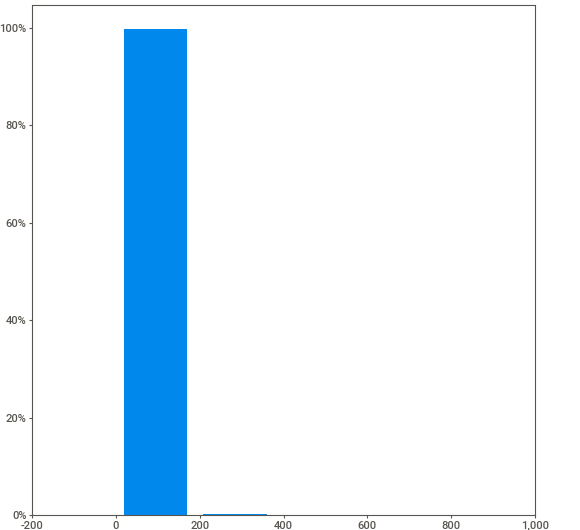
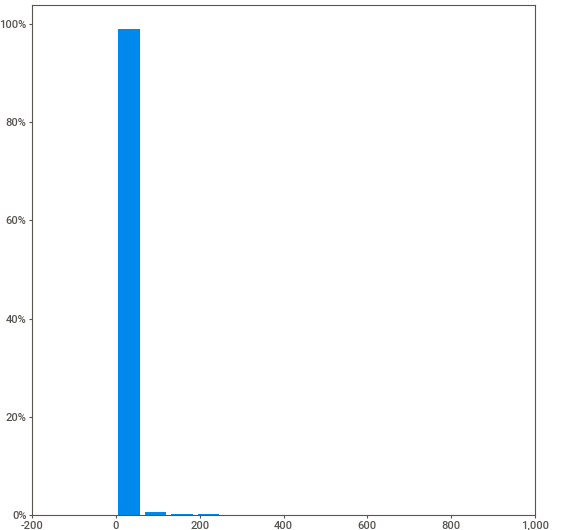
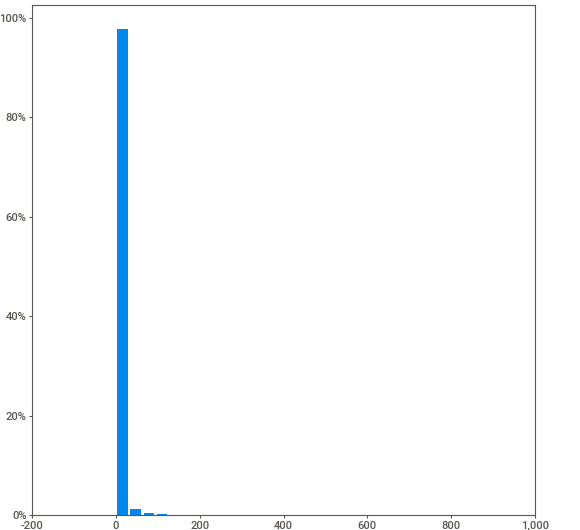
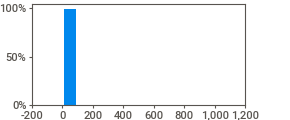
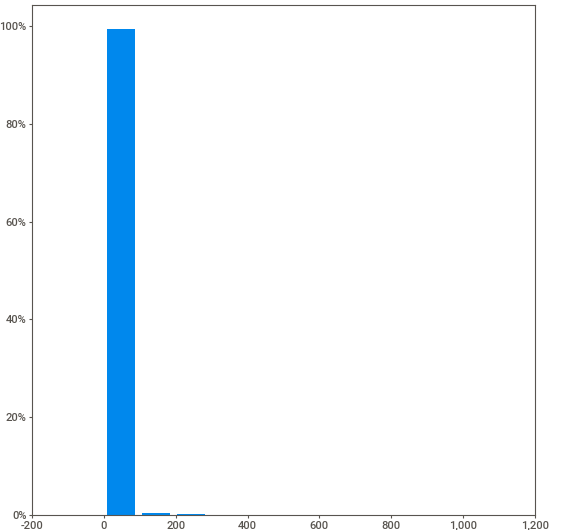
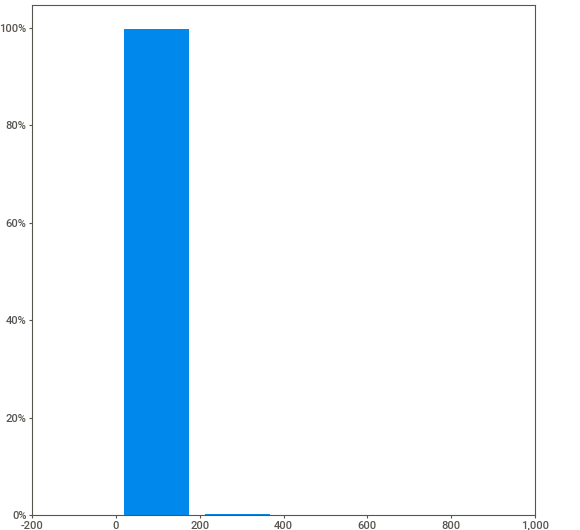
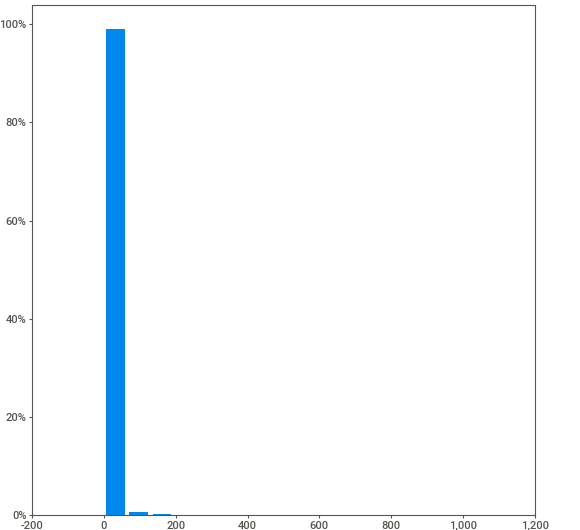
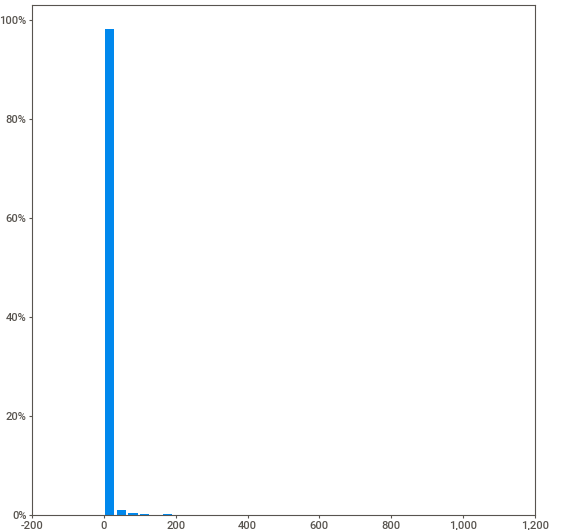
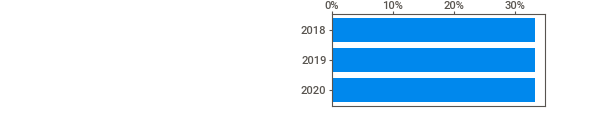
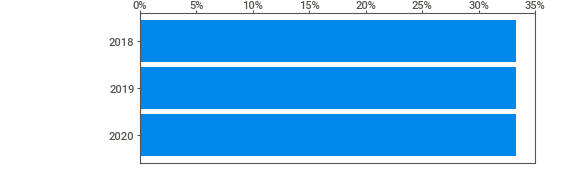
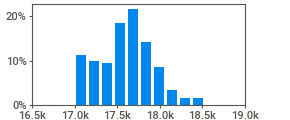
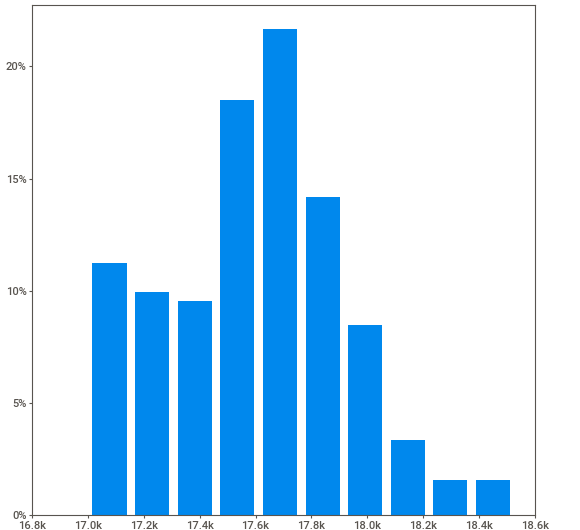
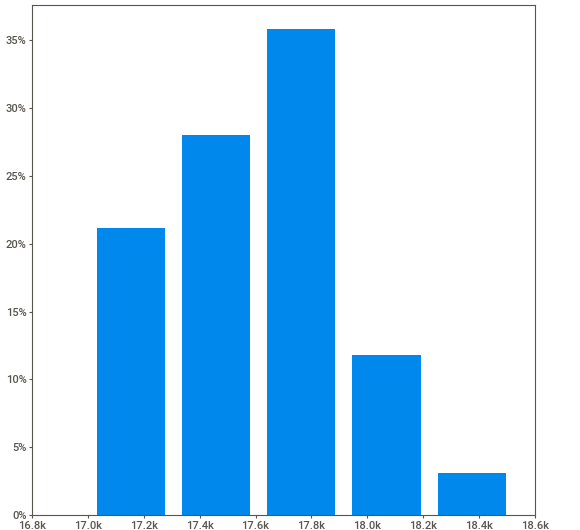
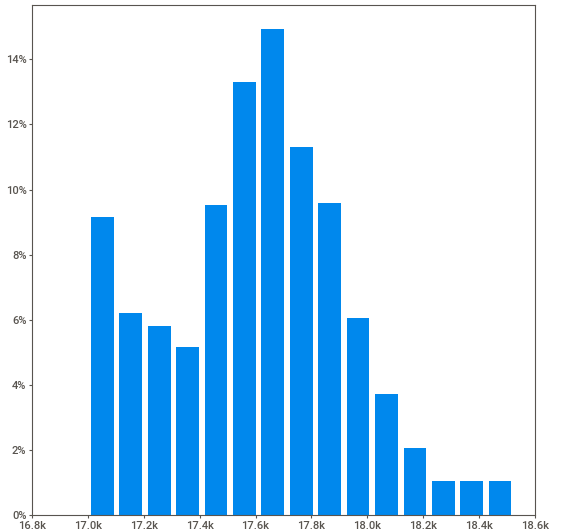
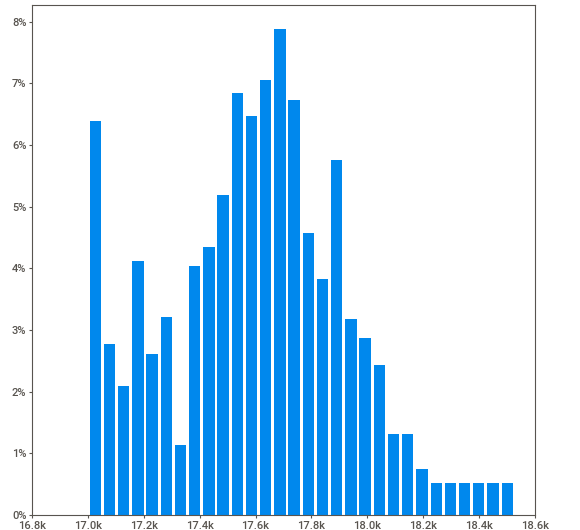
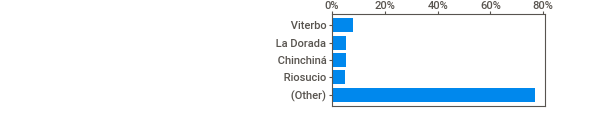
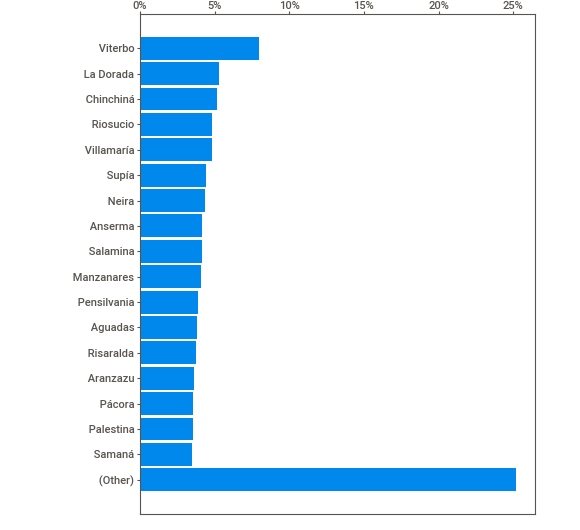
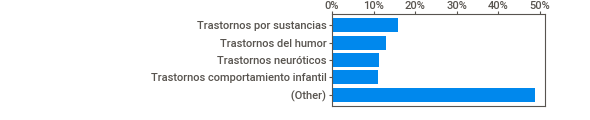
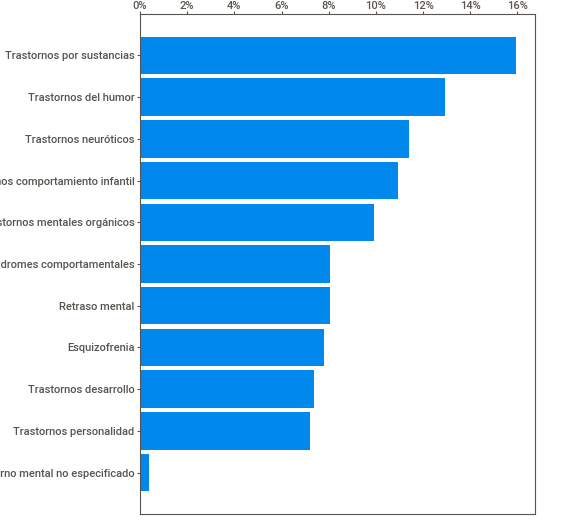
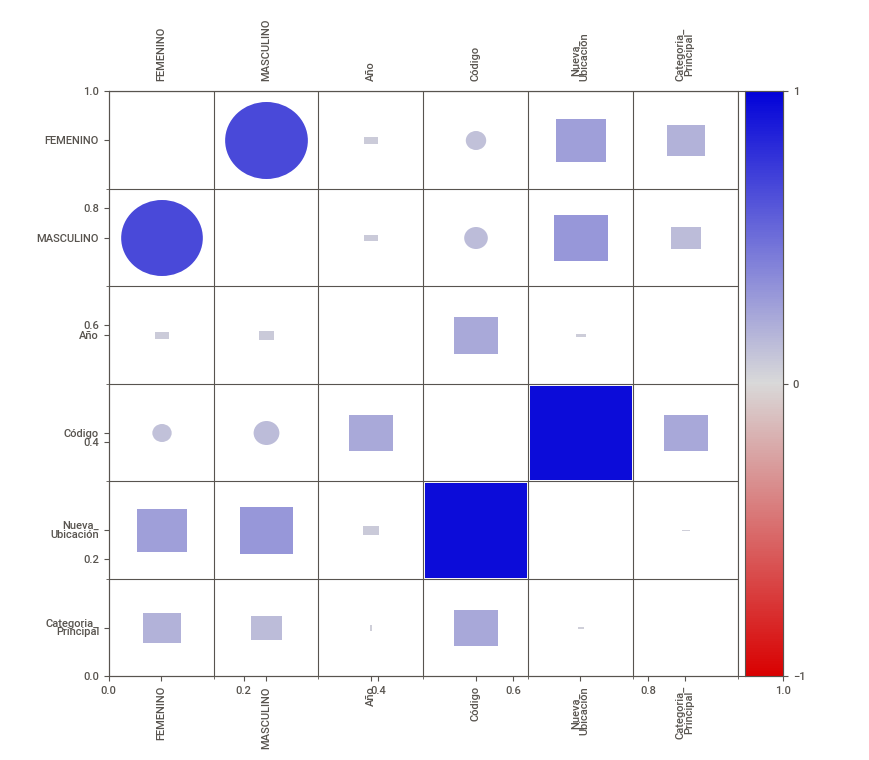
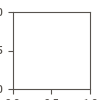

In [ ]:
#@title La función advert_report.show_notebook en Sweetviz muestra el reporte de análisis exploratorio de datos (EDA) en un notebook Jupyter.

# Parámetros:

# layout: ajusta el diseño ( 'widescreen' o 'full screen' )
# w y h: ajusta el ancho y alto en píxeles
# scale: ajusta el tamaño (0.9 = 90% de la resolución original)
advert_report.show_notebook(layout='widescreen', w=1500, h=500, scale=0.9)


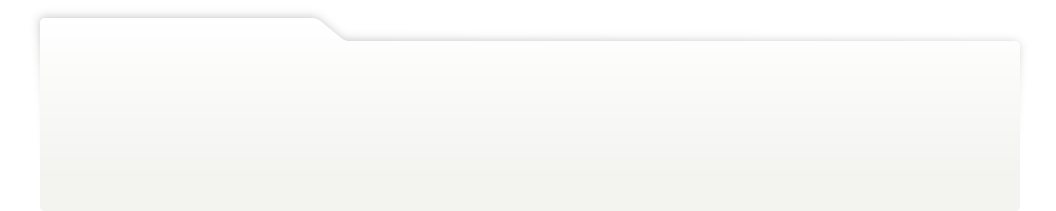
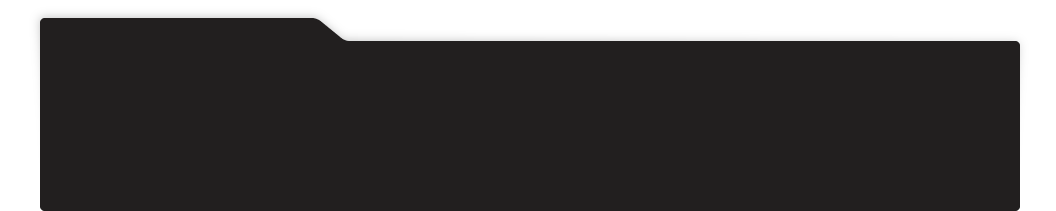
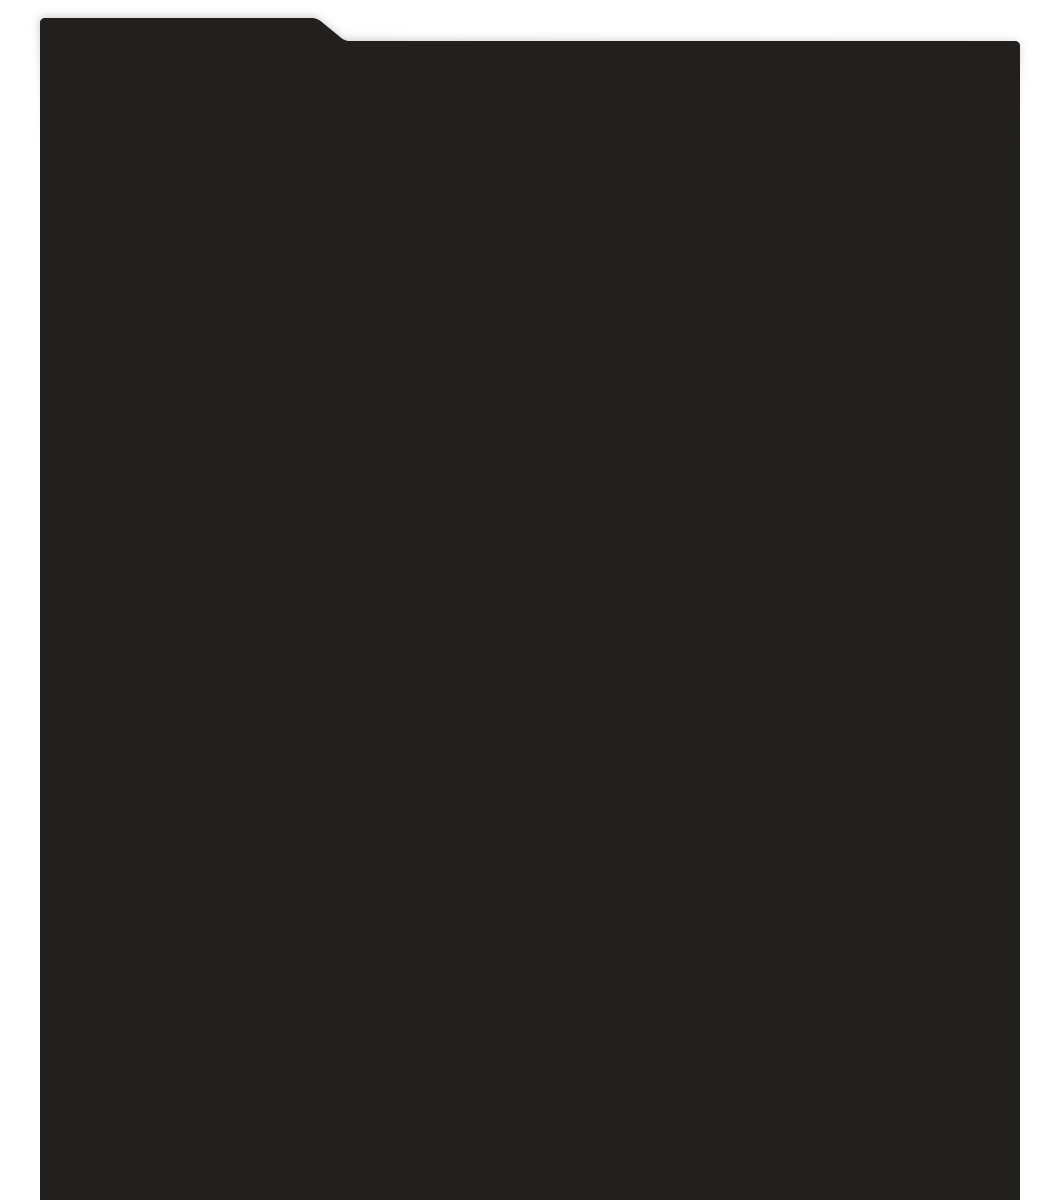
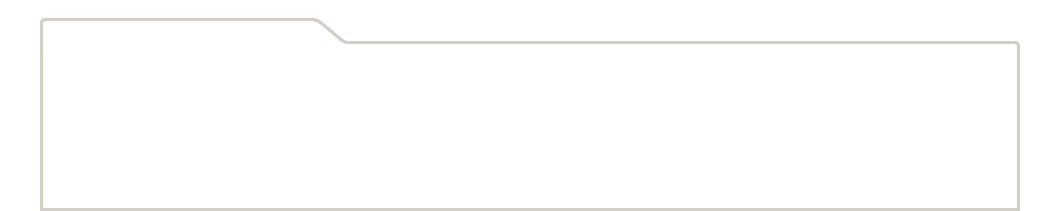
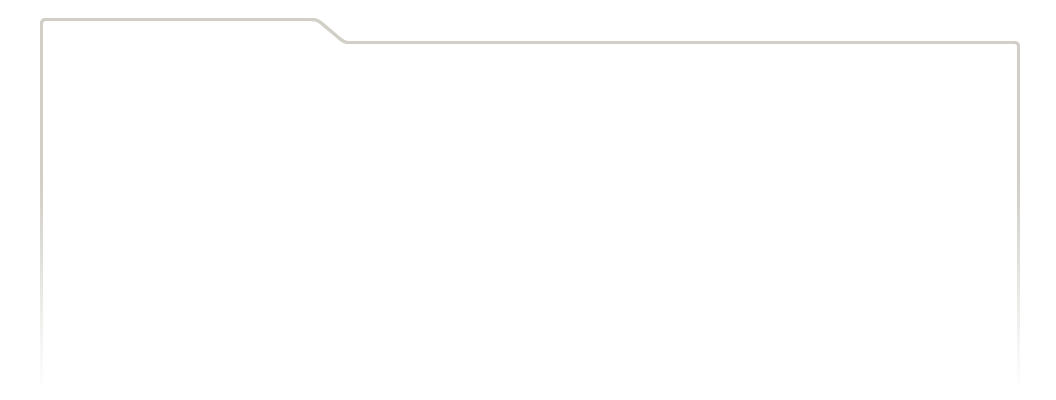
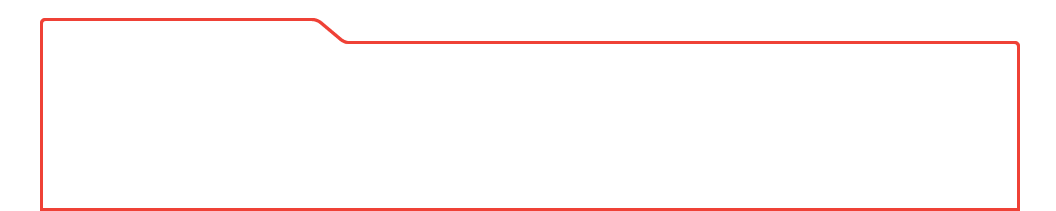
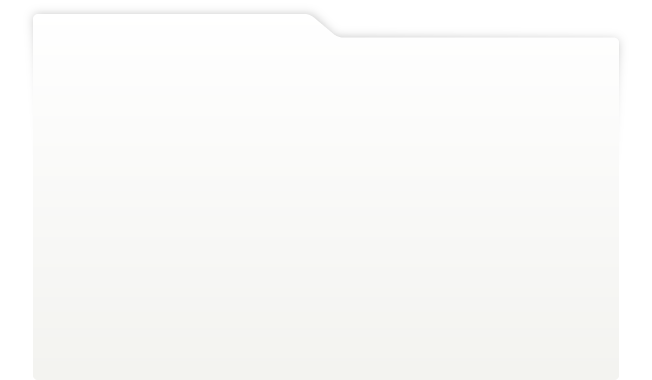
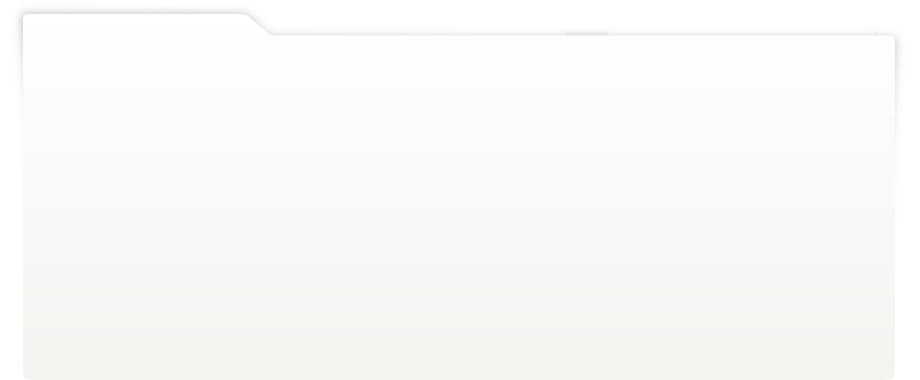
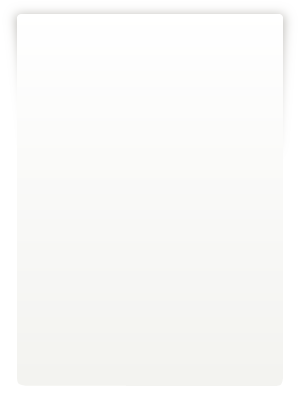
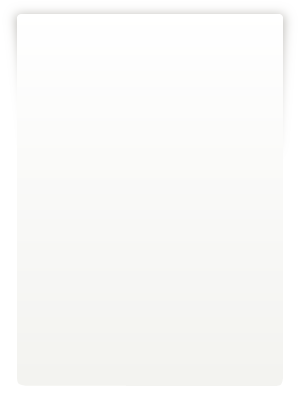
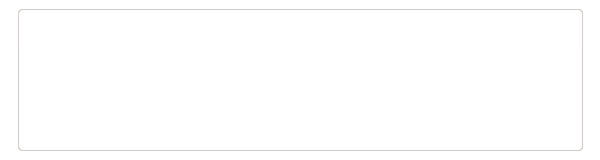
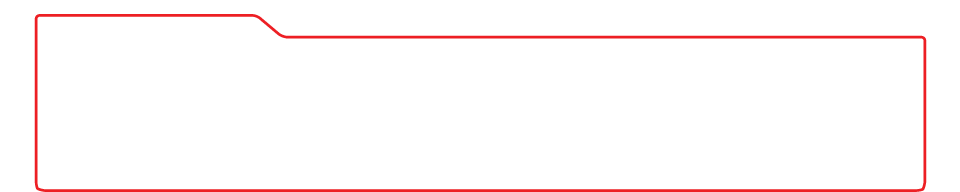
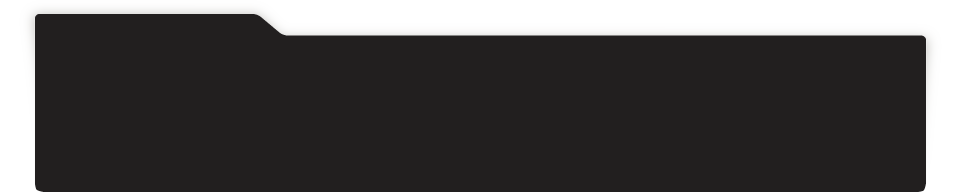
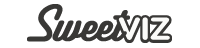
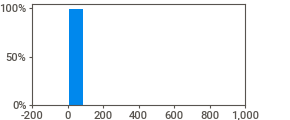
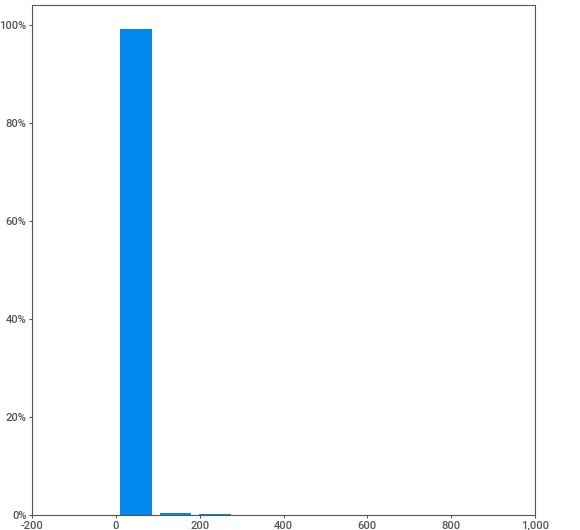
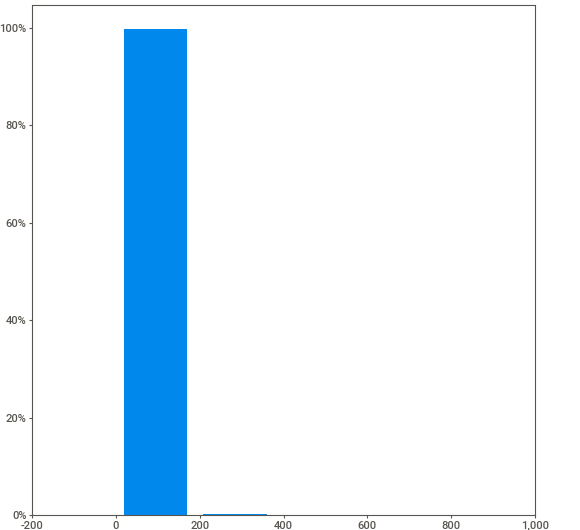
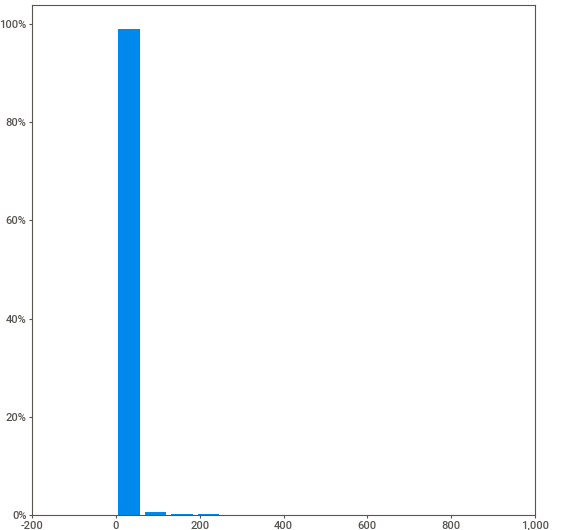
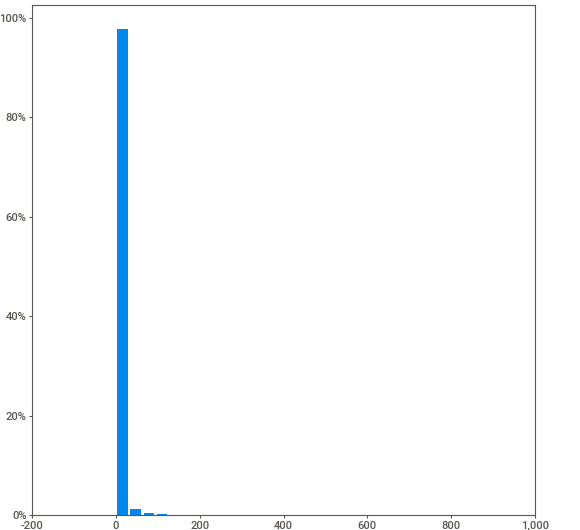
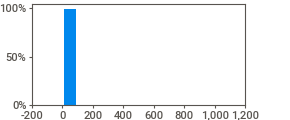
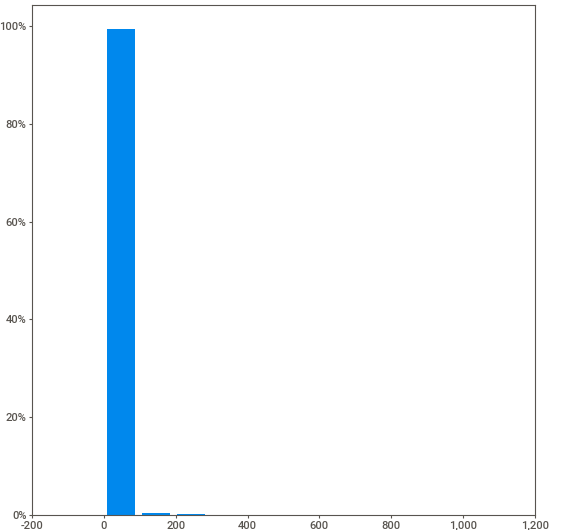
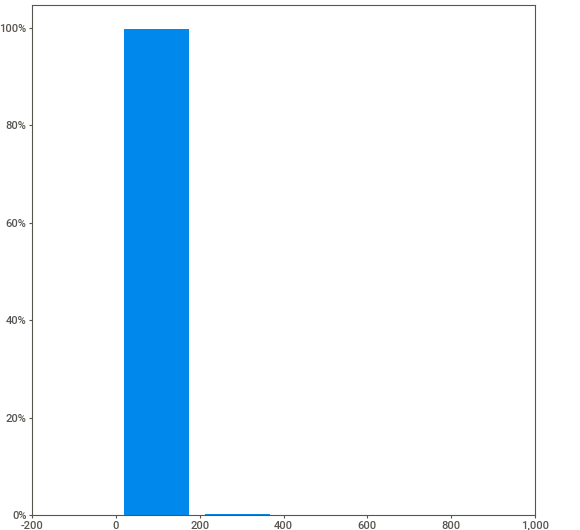
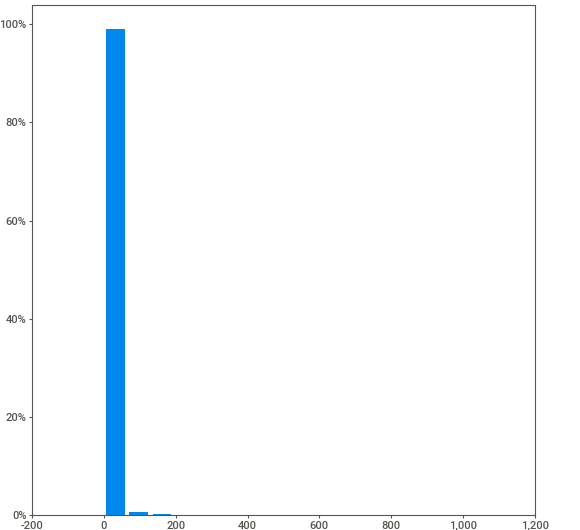
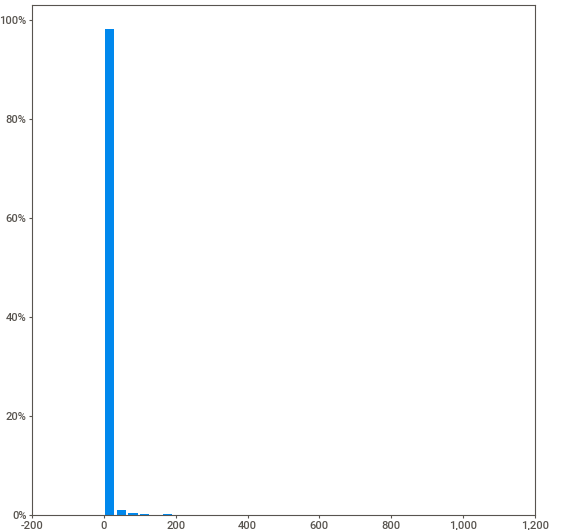
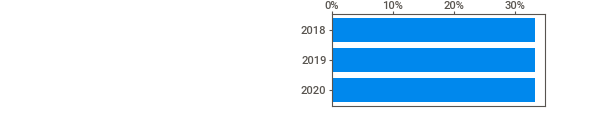
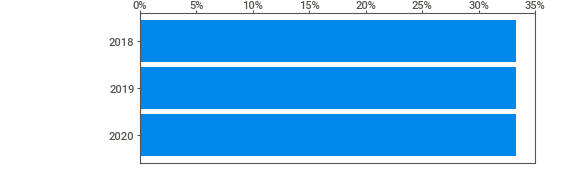
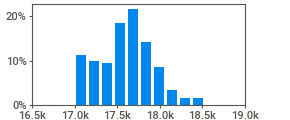
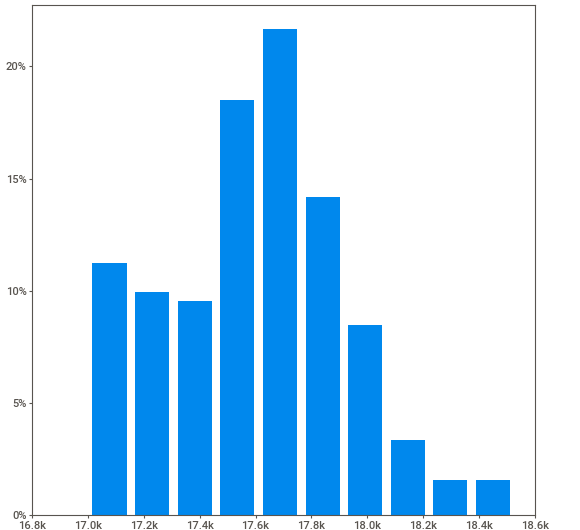
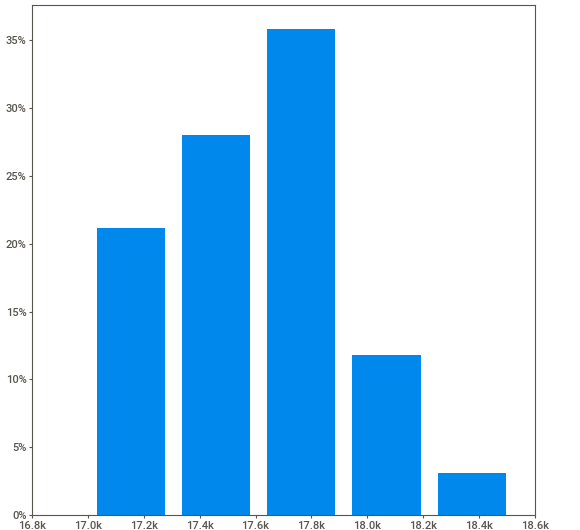
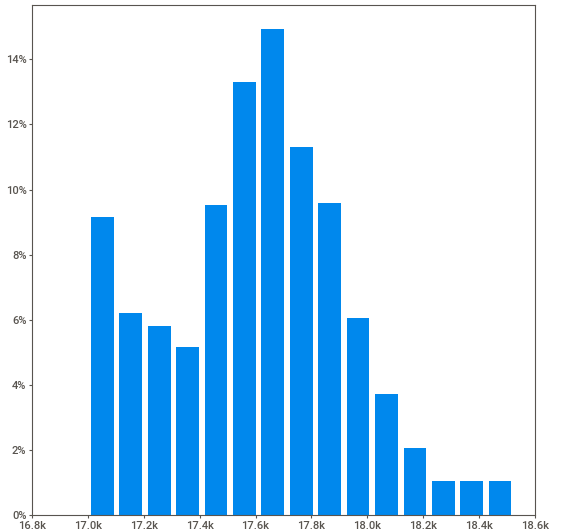
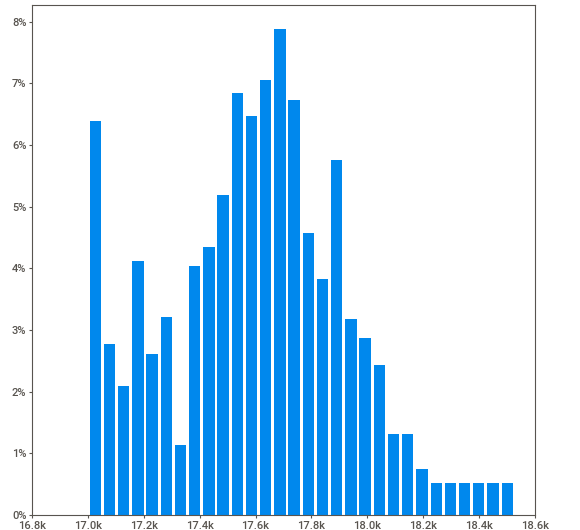
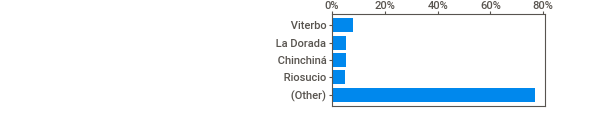
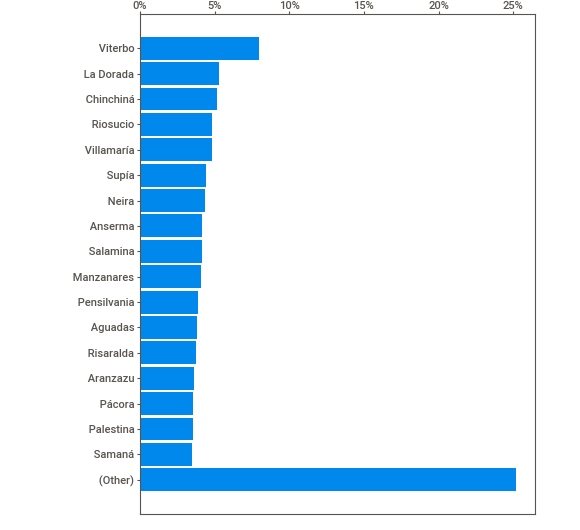
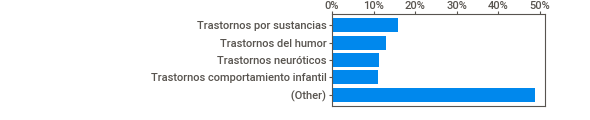
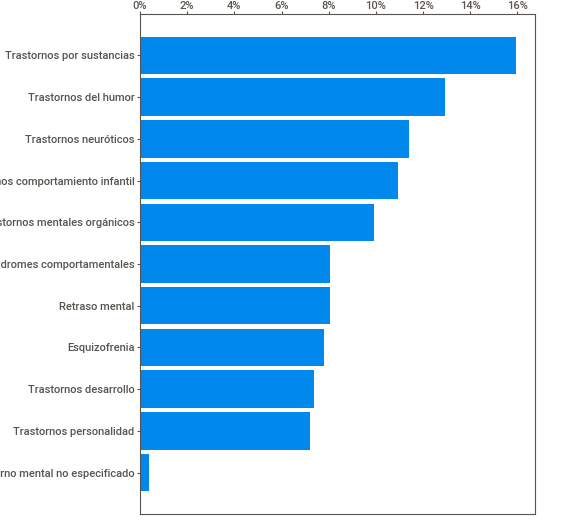
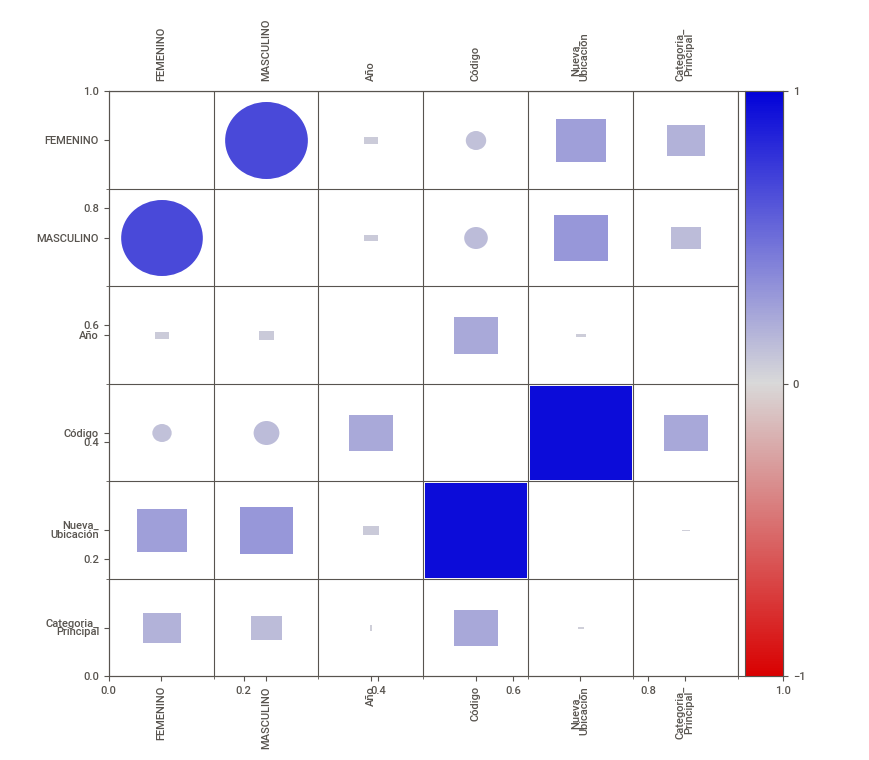
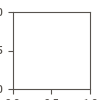

In [ ]:
#@title La función advert_report.show_notebook muestra el reporte de análisis exploratorio de datos (EDA) en un notebook Jupyter, con el siguiente formato:

# layout='vertical': muestra los datos en una columna vertical
# w=1400 y h=500: ajusta el ancho y alto del reporte a 1400x500 píxeles
# scale=0.9: muestra el reporte a un 90% de su tamaño original
advert_report.show_notebook(layout='vertical', w=1400, h=500, scale=0.9)

![](https://i.pinimg.com/originals/88/66/7e/88667eaf29f1bbf12d64abaaeae6caa2.gif)

# 3 Sección

In [ ]:
df_final.Categoria_Principal.value_counts()

,count
Categoria_Principal,
Trastornos por sustancias,3114
Trastornos del humor,2523
Trastornos neuróticos,2229
Trastornos comportamiento infantil,2139
Trastornos mentales orgánicos,1938
Síndromes comportamentales,1575
Retraso mental,1575
Esquizofrenia,1524
Trastornos desarrollo,1437


In [ ]:
df_final.Código.value_counts()

,count
Código,
17001,395
17380,347
17174,344
17042,274
17433,273
...,...
18433,2
18434,2
18435,2


In [ ]:
df_final.columns

Index(['Atención', 'FEMENINO', 'MASCULINO', 'Año', 'Código', 'Nueva_Ubicación',
       'Categoria_Principal', 'Subcategoria', 'Codigo', 'Descripcion'],
      dtype='object')

In [ ]:
# seleccionar_columnas = ['FEMENINO', 'MASCULINO', 'Año', 'Código', 'Nueva_Ubicación',
#                         'Categoria_Principal', 'Subcategoria', 'Codigo', 'Descripcion']
seleccionar_columnas = ['FEMENINO', 'MASCULINO', 'Año', 'Nueva_Ubicación',
                        'Categoria_Principal', 'Subcategoria', 'Codigo']
df_final_columnas_seleccionadas = df_final[seleccionar_columnas]

In [ ]:
%pip install h2o
%pip install rdt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.8/265.8 MB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.46.0.6-py2.py3-none-any.whl size=265859786 sha256=22a1f15e3e11f1958447acdd3df6b9c3674dbaf8b0f70e1f3b32c8cd7b83c29d
  Stored in directory: /root/.cache/pip/wheels/62/f9/aa/687bd54342d2981bc78e22ee9b9bc39f92006e344e7aa1e0ac
Successfully built h2o
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 12.2 MB/s eta 0:00:00


In [ ]:
# Importar librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import h2o
from h2o.estimators.kmeans import H2OKMeansEstimator
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from rdt import HyperTransformer

In [ ]:
df_final_columnas_seleccionadas.columns

Index(['FEMENINO', 'MASCULINO', 'Año', 'Código', 'Nueva_Ubicación',
       'Categoria_Principal', 'Subcategoria', 'Codigo', 'Descripcion'],
      dtype='object')

In [ ]:
df_final_columnas_seleccionadas.shape

(19530, 9)

Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,22 mins 19 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,4 months and 9 days
H2O_cluster_name:,H2O_from_python_unknownUser_l5g6ge
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.167 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
kmeans Model Build progress: |███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


kmeans Model Build progress: |███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


kmeans Model Build progress: |███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


kmeans Model Build progress: |███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


kmeans Model Build progress: |███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


kmeans Model Build progress: |███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


kmeans Model Build progress: |███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


kmeans Model Build progress: |███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


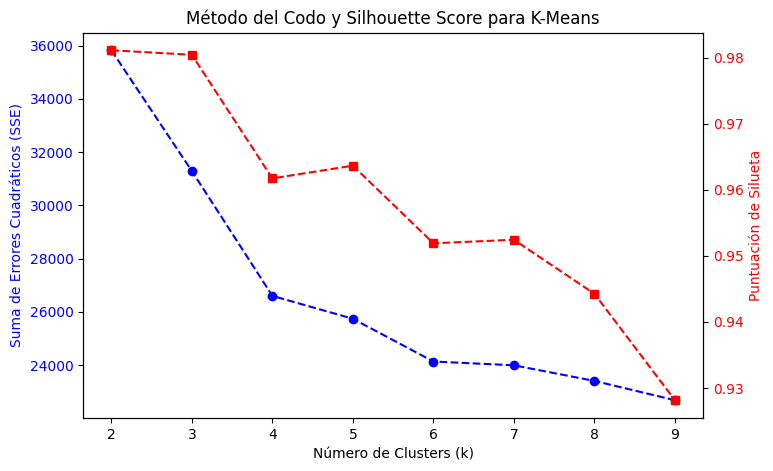

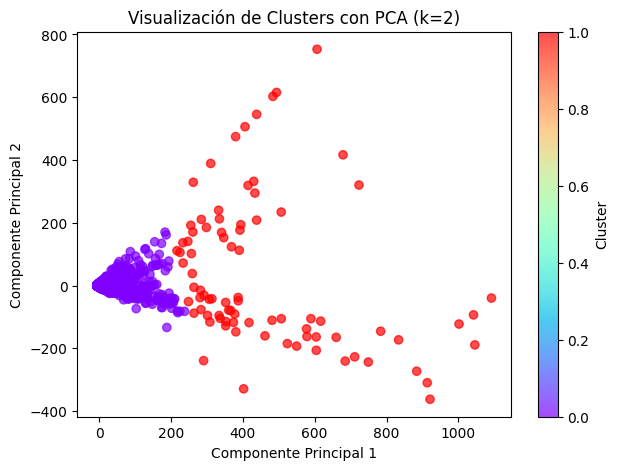

In [ ]:
# 🔹 Inicializar H2O
h2o.init()

# 1️⃣ Cargar el dataset
df = df_final_columnas_seleccionadas[['FEMENINO', 'MASCULINO', 'Categoria_Principal']].copy()

# 3️⃣ Aplicar transformación con RDT 🚀
ht = HyperTransformer()
ht.detect_initial_config(df)
ht.fit(df)
df_transformed = ht.transform(df)
df_transformed = pd.DataFrame(df_transformed, columns=df.columns)

# 4️⃣ Convertir a H2OFrame 📄
df_h2o = h2o.H2OFrame(df_transformed)

# 5️⃣ Aplicar PCA y reducir a 2 dimensiones
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_transformed)

# 6️⃣ Definir valores de K a probar
k_values = range(2, 10)
sse_values = []
silhouette_values = []
cluster_results = {}

for k in k_values:
    # 🔹 Definir y entrenar K-Means en H2O
    kmeans = H2OKMeansEstimator(k=k)
    kmeans.train(x=df_h2o.columns, training_frame=df_h2o)

    # 🔹 Obtener SSE
    sse_values.append(kmeans.tot_withinss())

    # 🔹 Obtener etiquetas de clusters y calcular la silueta
    cluster_assignments = kmeans.predict(df_h2o)
    labels = h2o.as_list(cluster_assignments).values.flatten()

    # silhouette_score
    silhouette_avg = silhouette_score(df_pca, labels)  # Calcular silhouette
    silhouette_values.append(silhouette_avg)

    # Guardar resultados para visualización
    cluster_results[k] = labels

# 🔹 Graficar Método del Codo y Silhouette Score
fig, ax1 = plt.subplots(figsize=(8, 5))

ax1.plot(k_values, sse_values, marker='o', linestyle='--', color='b', label='SSE')
ax1.set_xlabel('Número de Clusters (k)')
ax1.set_ylabel('Suma de Errores Cuadráticos (SSE)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(k_values, silhouette_values, marker='s', linestyle='--', color='r', label='Silhouette Score')
ax2.set_ylabel('Puntuación de Silueta', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Método del Codo y Silhouette Score para K-Means')
plt.show()

# 🔹 Visualización de los Clusters en 2D (PCA)
best_k = max(cluster_results, key=lambda k: silhouette_values[k_values.index(k)])  # k con mejor silhouette
best_labels = cluster_results[best_k]

plt.figure(figsize=(7, 5))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=best_labels, cmap='rainbow', alpha=0.7)
plt.title(f'Visualización de Clusters con PCA (k={best_k})')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
# prompt: necesito el codigo de como quedan en orden las ceracterísticas relevantes luego de aplicar lo siguiente:
# pca = PCA(n_components=2)
# df_pca = pca.fit_transform(df_transformed)

# The order of features after PCA is not preserved in the original feature space.
# PCA creates new components (principal components) that are linear combinations of the original features.
# df_pca[:, 0] represents the first principal component, and df_pca[:, 1] the second.
# These components do not directly correspond to the original columns in df_transformed.

# To understand the contribution of original features to these new components, you can examine:

# 1. pca.components_:  This attribute of the fitted PCA object gives the loadings of each original feature on each principal component.
#    Each row corresponds to a principal component, and each column corresponds to an original feature. The value represents the weight of that feature in that component.
#    Higher absolute values indicate a larger contribution.

# Example:
print(pca.components_)

# You can then create a DataFrame for better readability
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=df_transformed.columns)
print(loadings)

# 2. pca.explained_variance_ratio_: This shows the variance explained by each principal component.
pca.explained_variance_ratio_

# This helps you understand how much information each PC captures.


# In summary:  The order of features in df_pca does *not* reflect the original feature order.
# The loadings (pca.components_) provide the mapping between original features and principal components.


[[ 7.77310662e-01  6.29116943e-01  8.66389138e-05]
 [-6.29116901e-01  7.77310541e-01  4.98413864e-04]]
                          PC1       PC2
FEMENINO             0.777311 -0.629117
MASCULINO            0.629117  0.777311
Categoria_Principal  0.000087  0.000498


array([0.8276699 , 0.17227799])

In [ ]:
# prompt: necesito que me ordenes las características con mayor relevancia luego de realizar lo siguiente:
# pca = PCA(n_components=2)
# df_pca = pca.fit_transform(df_transformed)

import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming 'healthy_life_df_columnas_seleccionadas' is your DataFrame
# and it has been preprocessed as shown in the code.

# Select numerical columns for PCA
df = df_final_columnas_seleccionadas.copy()

# 3️⃣ Aplicar transformación con RDT 🚀
ht = HyperTransformer()
ht.detect_initial_config(df)
ht.fit(df)
df_transformed = ht.transform(df)
df_transformed = pd.DataFrame(df_transformed, columns=df.columns)

# Apply PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_transformed)

# Get explained variance ratios
explained_variance_ratio = pca.explained_variance_ratio_

# Create a DataFrame with feature importance based on explained variance
feature_importance = pd.DataFrame({'feature': numeric_cols.columns,
                                    'importance': abs(pca.components_[0])}) # Use absolute value for ranking

# Sort by importance in descending order
feature_importance = feature_importance.sort_values('importance', ascending=False)


print("Feature Importance after PCA:")
print(feature_importance)

#Now you have feature_importance sorted, so you can access the features in order of importance:
most_important_features = feature_importance["feature"].to_list()
print("\nMost important features (ordered):", most_important_features)


Feature Importance after PCA:
               feature  importance
0             FEMENINO    0.777311
1            MASCULINO    0.629117
3      Nueva_Ubicación    0.000299
4  Categoria_Principal    0.000087
5         Subcategoria    0.000042
6               Codigo    0.000041
2                  Año    0.000021

Most important features (ordered): ['FEMENINO', 'MASCULINO', 'Nueva_Ubicación', 'Categoria_Principal', 'Subcategoria', 'Codigo', 'Año']


In [ ]:
# seleccionar las poblaciones
df_final_columnas_seleccionadas.shape

(19530, 7)

In [ ]:
pd.DataFrame(best_labels).value_counts()

,count
0,
0,19446
1,84


In [ ]:
df_final_columnas_seleccionadas[best_labels==0]

,FEMENINO,MASCULINO,Año,Nueva_Ubicación,Categoria_Principal,Subcategoria,Codigo
0,9.0,11.0,2018,Manizales,Trastornos mentales orgánicos,"DEMENCIA EN LA ENFERMEDAD DE ALZHEIMER, DE COM...",F000
1,63.0,21.0,2018,Manizales,Trastornos mentales orgánicos,"DEMENCIA EN LA ENFERMEDAD DE ALZHEIMER, DE COM...",F001
2,43.0,25.0,2018,Manizales,Trastornos mentales orgánicos,"DEMENCIA EN LA ENFERMEDAD DE ALZHEIMER, ATIPIC...",F002
3,193.0,81.0,2018,Manizales,Trastornos mentales orgánicos,"DEMENCIA EN LA ENFERMEDAD DE ALZHEIMER, NO ESP...",F009
4,2.0,0.0,2018,Manizales,Trastornos mentales orgánicos,DEMENCIA VASCULAR DE COMIENZO AGUDO,F010
...,...,...,...,...,...,...,...
19525,0.0,0.0,2020,Viterbo,Trastornos comportamiento infantil,TRASTORNOS DE LOS MOVIMIENTOS ESTEREOTIPADOS,F984
19526,0.0,0.0,2020,Viterbo,Trastornos comportamiento infantil,TARTAMUDEZ [ESPASMOFEMIA],F985
19527,3.0,3.0,2020,Viterbo,Trastornos comportamiento infantil,OTROS TRASTORNOS EMOCIONALES Y DEL COMPORTAMIE...,F988
19528,1.0,1.0,2020,Viterbo,Trastornos comportamiento infantil,"TRASTORNOS NO ESPECIFICADOS, EMOCIONALES Y DEL...",F989


In [ ]:
df_final_columnas_seleccionadas[best_labels==1]

,FEMENINO,MASCULINO,Año,Nueva_Ubicación,Categoria_Principal,Subcategoria,Codigo
16,270.0,163.0,2018,Manizales,Trastornos mentales orgánicos,"DEMENCIA , NO ESPECIFICADA",F03X
29,247.0,151.0,2018,Manizales,Trastornos mentales orgánicos,TRASTORNO COGNOSCITIVO LEVE,F067
122,93.0,347.0,2018,Manizales,Trastornos por sustancias,TRASTORNOS MENTALES Y DEL COMPORTAMIENTO DEBID...,F192
138,100.0,301.0,2018,Manizales,Esquizofrenia,"ESQUIZOFRENIA, NO ESPECIFICADA",F209
165,604.0,224.0,2018,Manizales,Trastornos del humor,"TRASTORNO AFECTIVO BIPOLAR, EPISODIO DEPRESIVO...",F313
...,...,...,...,...,...,...,...
13377,270.0,755.0,2020,Viterbo,Trastornos comportamiento infantil,PERTURBACION DE LA ACTIVIDAD Y DE LA ATENCION,F900
13378,82.0,314.0,2020,Viterbo,Trastornos comportamiento infantil,TRASTORNO HIPERCINETICO DE LA CONDUCTA,F901
13385,108.0,269.0,2020,Viterbo,Trastornos comportamiento infantil,OTROS TRASTORNOS DE LA CONDUCTA,F918
13386,189.0,403.0,2020,Viterbo,Trastornos comportamiento infantil,"TRASTORNO DE LA CONDUCTA, NO ESPECIFICADO",F919


In [ ]:
# @title Análisis exploratorio de datos (EDA)
#Configurar las opciones de visualizacion Sweetviz
sw.config_parser.read_string("""
                              [Output_Defaults]
                              html_layout = widescreen
                              html_scale = 1.0
                              notebook_layout = widescreen
                              notebook_scale = 0.9
                              notebook_width = 100%
                              notebook_height = 700
                              [Layout]
                              show_logo = 0
                              """)
nombre1 = 'grupo1'
nombre2 = 'grupo2'

advert_report = sw.compare([df_final_columnas_seleccionadas[best_labels==0], nombre1], [df_final_columnas_seleccionadas[best_labels==1], nombre2]) # Realizamos el análisis de la base de datos inicial

#@markdown Guardar y mostrar reporte formato HTML
advert_report.show_html('EDA_df_final_columnas_seleccionadas.html')

#@markdown Descarga y abre el reporte en una nueva pestaña del navegador
almacenar_archivo = input('Alamcenar archivo Si o No: ').title()
if almacenar_archivo == 'Si':
  files.download('/content/EDA_df_final_columnas_seleccionadas.html')

                                             |          | [  0%]   00:00 -> (? left)

Report EDA_df_final_columnas_seleccionadas.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
Alamcenar archivo Si o No: si


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


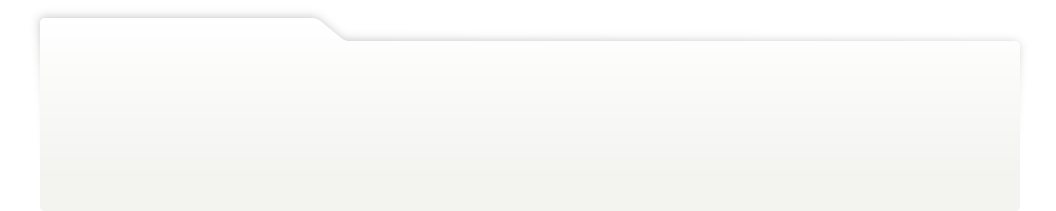
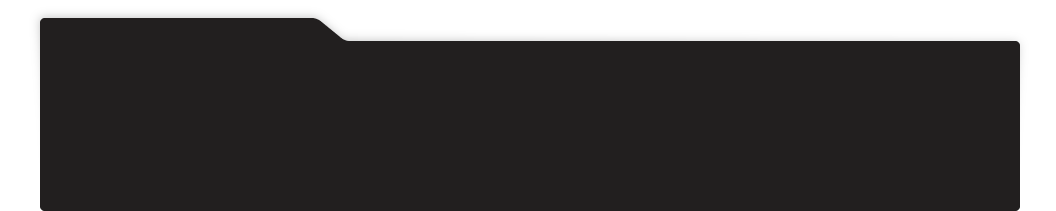
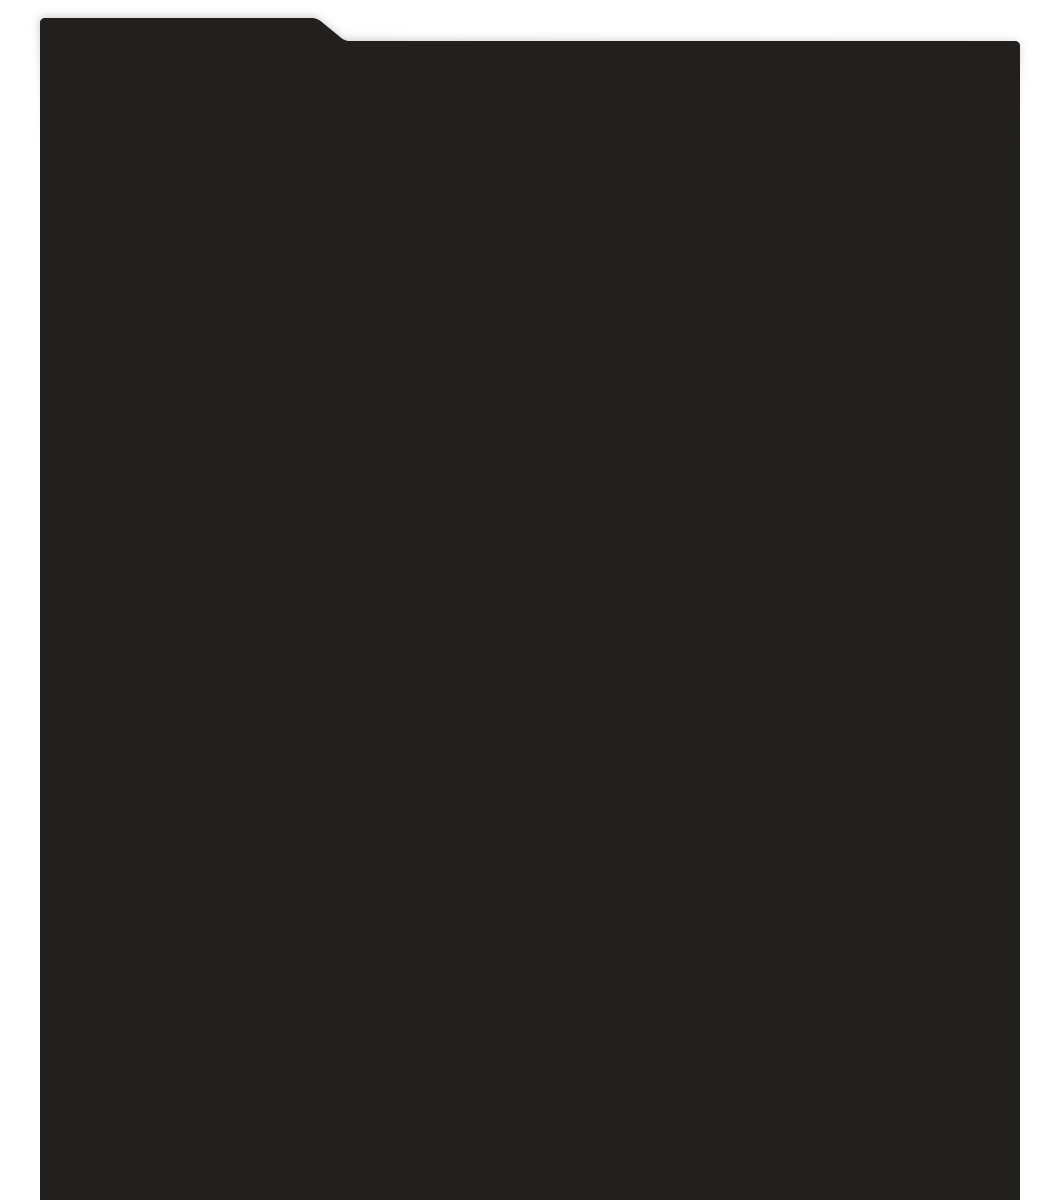
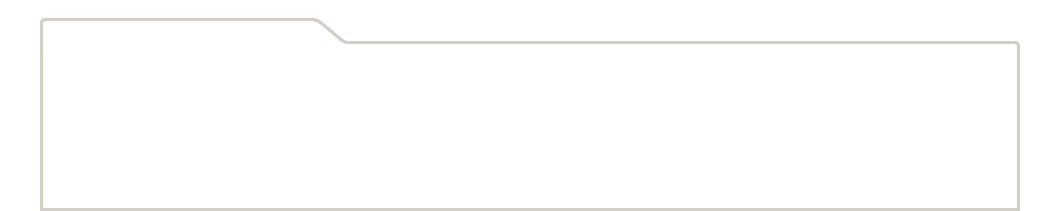
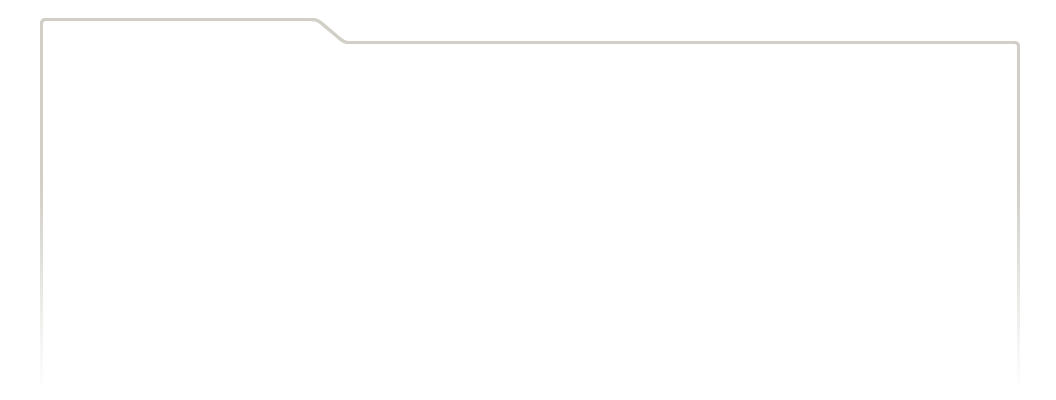
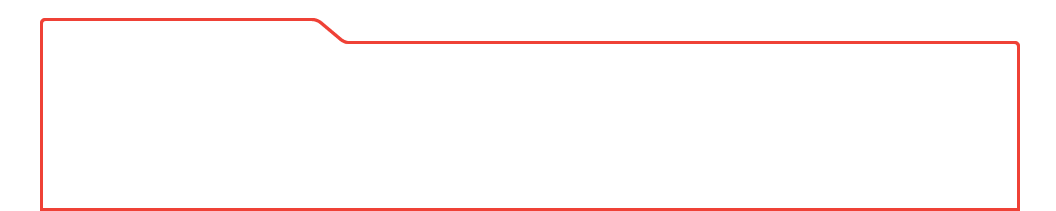
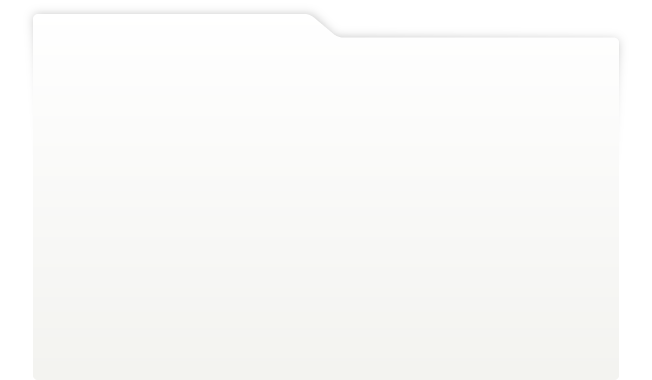
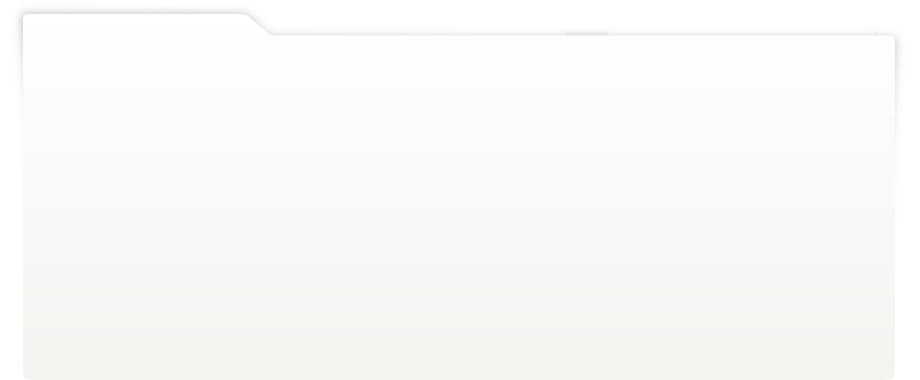
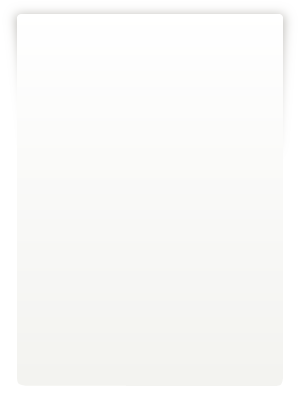
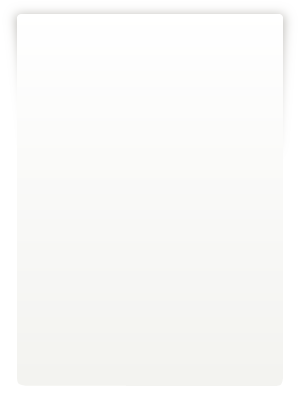
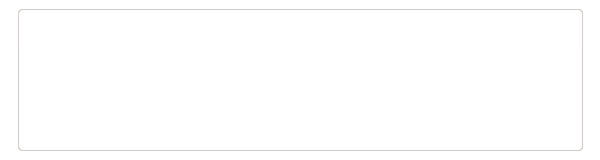
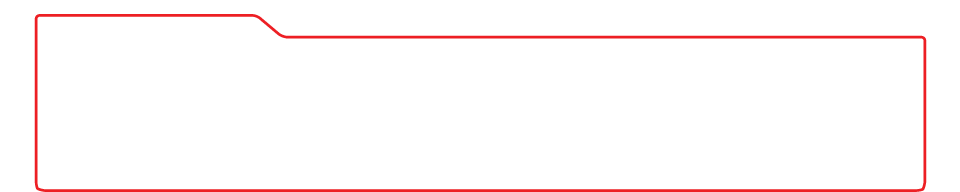
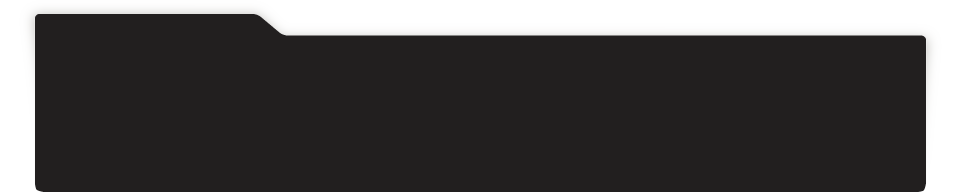
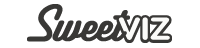
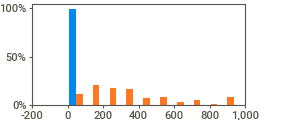
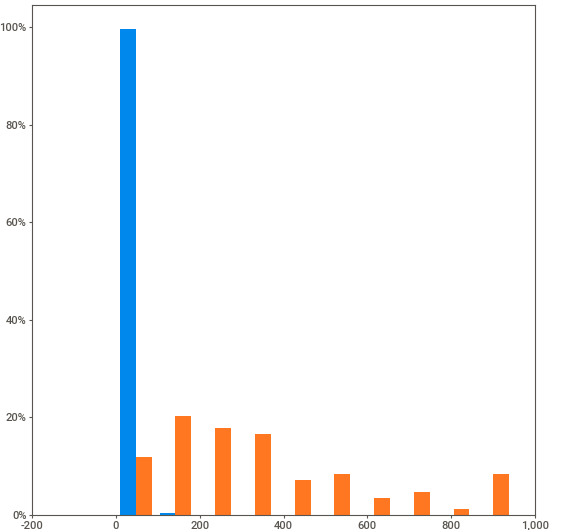
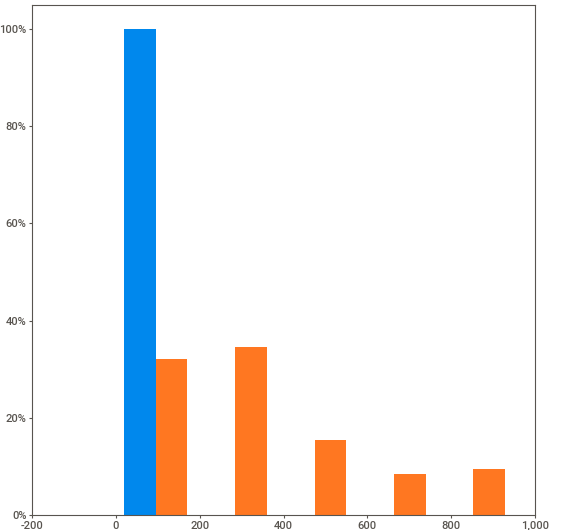
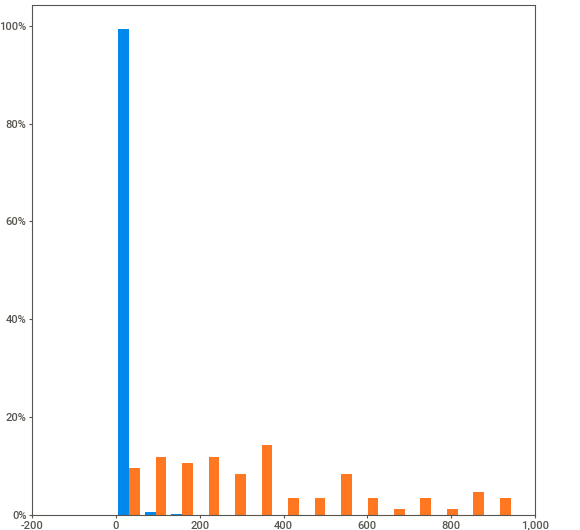
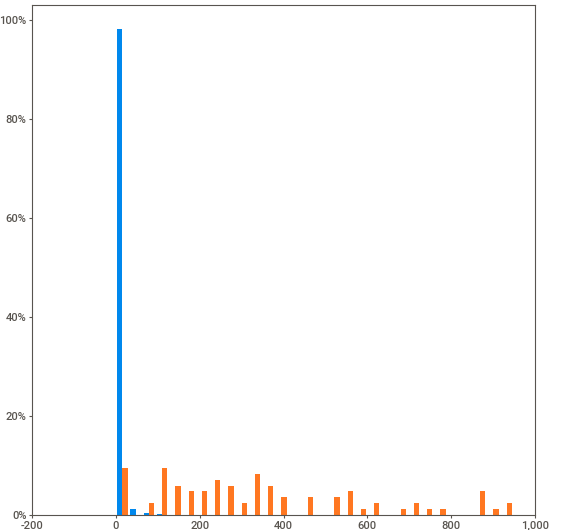
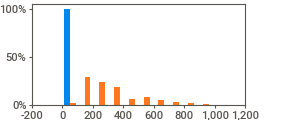
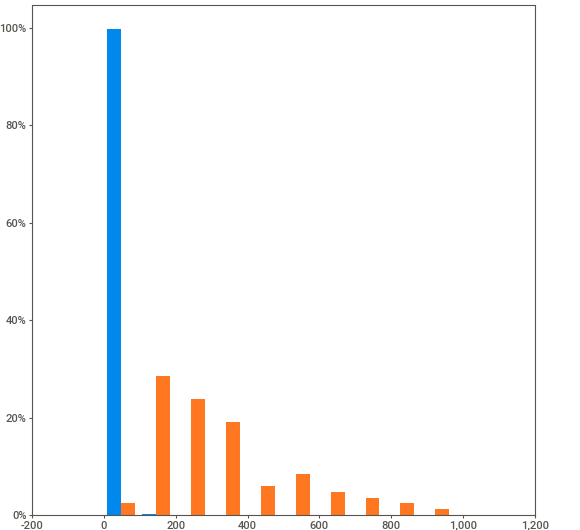
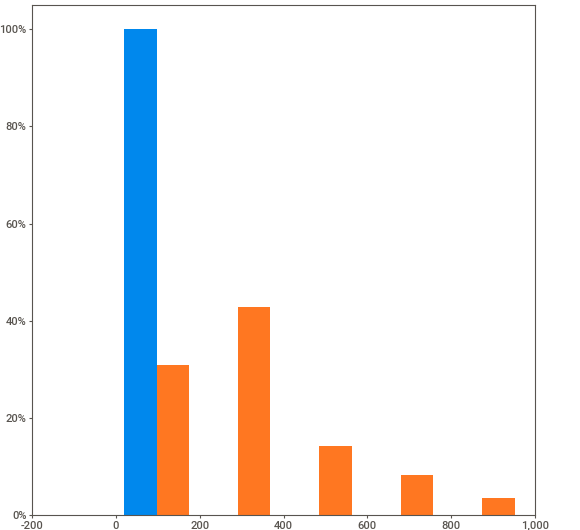
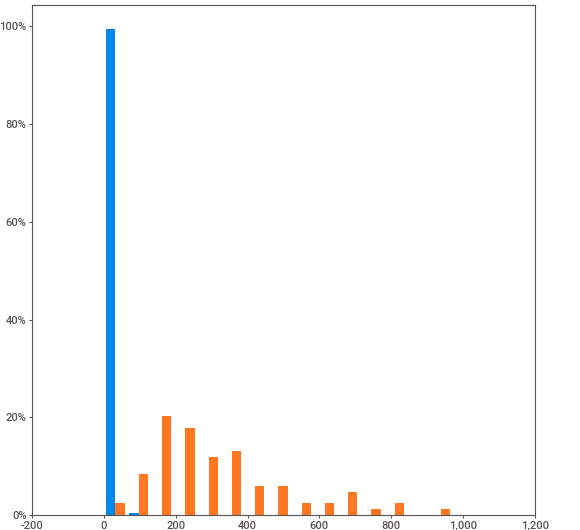
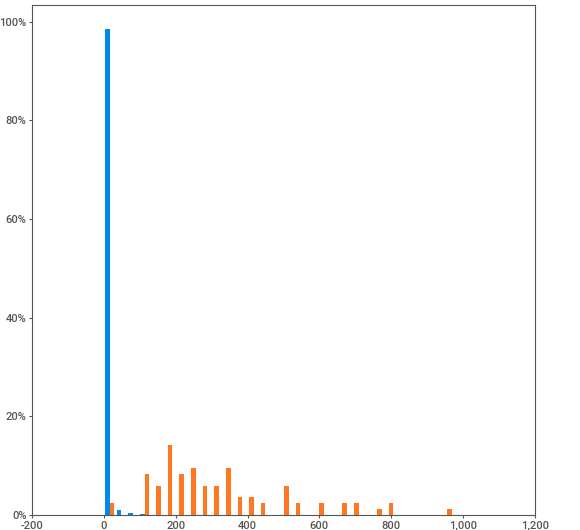
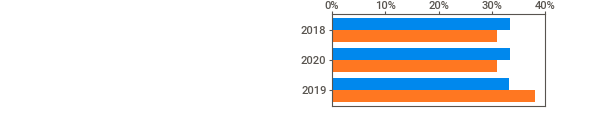
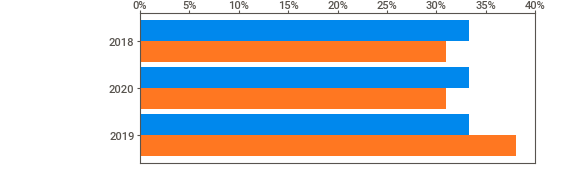
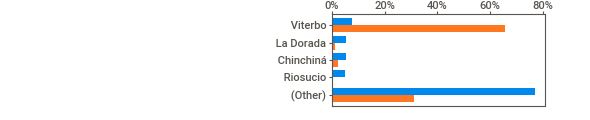
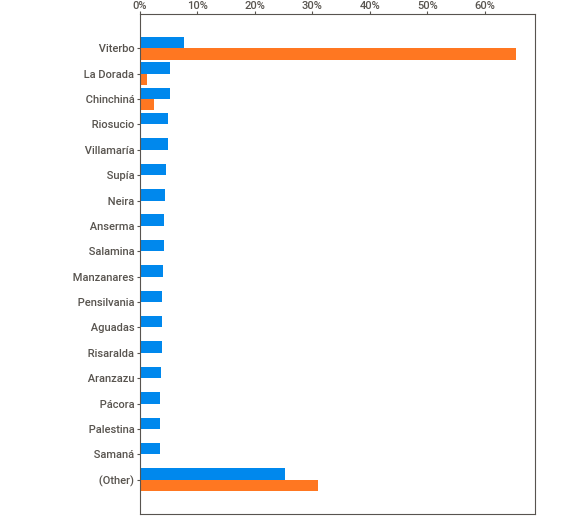
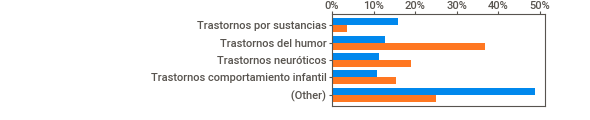
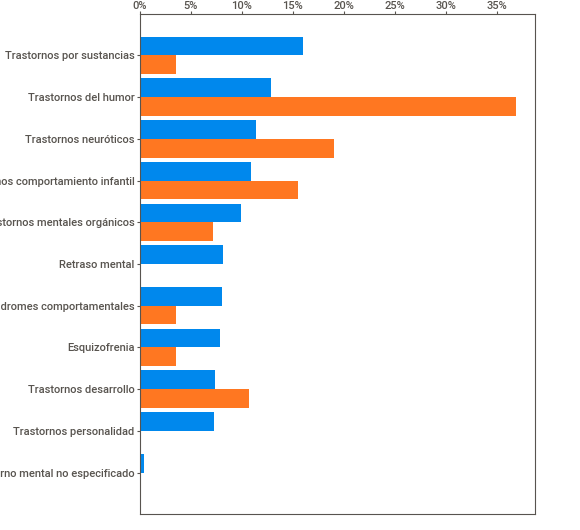
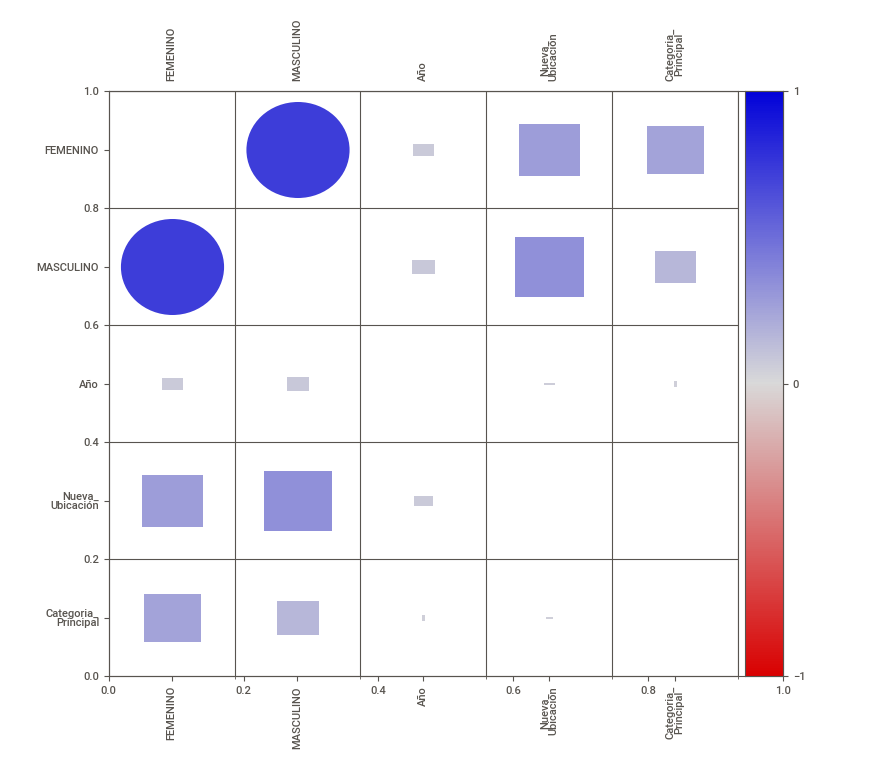
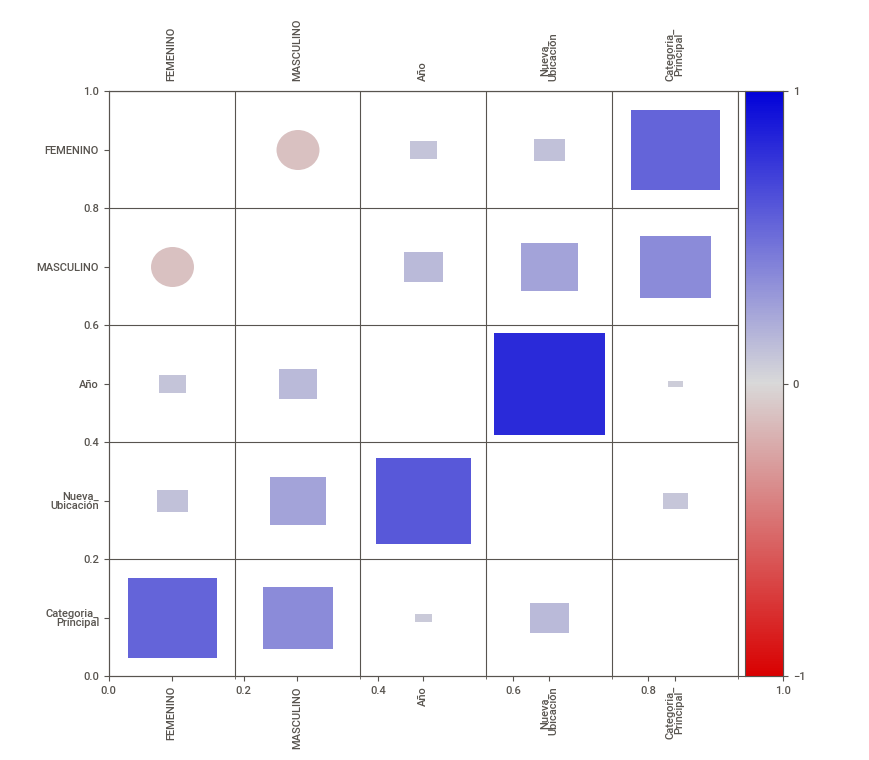

In [ ]:
#@title La función advert_report.show_notebook en Sweetviz muestra el reporte de análisis exploratorio de datos (EDA) en un notebook Jupyter.

# Parámetros:

# layout: ajusta el diseño ( 'widescreen' o 'full screen' )
# w y h: ajusta el ancho y alto en píxeles
# scale: ajusta el tamaño (0.9 = 90% de la resolución original)
advert_report.show_notebook(layout='widescreen', w=1500, h=500, scale=0.9)